In [1]:
import pandas as pd
import datetime
import json
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers
from matplotlib.image import imread
from keras.preprocessing import image
from sklearn.metrics import r2_score
import seaborn as sns

Using TensorFlow backend.


### Pulling stock list from Virtus LifeSci Biotech ETF

In [2]:
stocks = ['ITCI', 'AXSM', 'CVM', 'KRTX', 'APLS', 'PRVB', 'CRTX', 'EPZM',
       'CRBP', 'CCXI', 'TGTX', 'IMGN', 'FATE', 'AKBA', 'DNLI', 'RIGL',
       'PRNB', 'ARVN', 'ZYME', 'MRNA', 'CYTK', 'FTSV', 'ASND',
       'XBIT', 'ALEC', 'ORTX', 'ADVM', 'MGNX', 'AKRO', 'ESPR', 'BHVN',
       'YMAB', 'RGNX', 'MYOK', 'TPTX', 'ATNX', 'BLUE', 'AGEN', 'AVRO',
       'DCPH', 'CTMX', 'SRNE', 'ARDX', 'BCRX', 'RETA', 'KOD', 'DTIL',
       'RARX', 'AUTL', 'GTHX', 'CARA', 'KDMN', 'XNCR', 'ACHN', 'ARNA',
       'RCKT', 'TBIO', 'VYGR', 'SGMO', 'ODT', 'ANAB', 'ATRA', 'CNST',
       'GERN', 'BPMC', 'ALLO', 'BBIO', 'FGEN', 'PGNX', 'MGTX', 'NXTC',
       'IMMU', 'ZIOP', 'CRSP', 'IOVA', 'VKTX', 'EIDX', 'MYOV', 'AMRS',
       'KRYS', 'KURA', 'MDGL', 'UBX', 'TCDA', 'QURE', 'MRTX', 'ASMB',
       'GLYC', 'RYTM', 'FIXX', 'DRNA', 'ARWR', 'ALLK', 'GOSS', 'WVE']

In [3]:
with open('1_31_2020_pull.json', 'r') as file:
    data = json.load(file)

In [4]:
start = datetime.datetime.now()
period = [1, 2]
for stock in stocks:
    
    stock_dict_list = data[stock]
    num_days = len(stock_dict_list)
    for index, dict_ in enumerate(stock_dict_list):
        _open = dict_['Open']
        if index+period[1] >= num_days:
            _low = None
            _max = None
        else:
            _low = np.min([dict_['Low'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
            _max = np.max([dict_['High'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
        stock_dict_list[index]['Low_1'] = _low
        stock_dict_list[index]['Max_1'] = _max
    data[stock] = stock_dict_list

# 3 Day Max/Min Value (% Difference from Closing Price)
# The range is from the 2nd day to the 3rd after the input day
start = datetime.datetime.now()
period = [2, 4]
for stock in stocks:
    
    stock_dict_list = data[stock]
    num_days = len(stock_dict_list)
    for index, dict_ in enumerate(stock_dict_list):
        _open = dict_['Open']
        if index+period[1] >= num_days:
            _low = None
            _max = None
        else:
            _low = np.min([dict_['Low'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
            _max = np.max([dict_['High'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
        stock_dict_list[index]['Low_3'] = _low
        stock_dict_list[index]['Max_3'] = _max
    data[stock] = stock_dict_list

# 10 Day Max/Min Value (% Difference from Closing Price)
# The range is from the 4th day to the 10th after the input day

start = datetime.datetime.now()
period = [4, 11]
for stock in stocks:
    
    stock_dict_list = data[stock]
    num_days = len(stock_dict_list)
    for index, dict_ in enumerate(stock_dict_list):
        _open = dict_['Open']
        if index+period[1] >= num_days:
            _low = None
            _max = None
        else:
            _low = np.min([dict_['Low'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
            _max = np.max([dict_['High'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
        stock_dict_list[index]['Low_10'] = _low
        stock_dict_list[index]['Max_10'] = _max
    data[stock] = stock_dict_list

# 30 Day Max/Min Value (% Difference from Closing Price)
# The range is from the 11th day to the 30th after the input day
start = datetime.datetime.now()
period = [11, 31]
for stock in stocks:
    
    stock_dict_list = data[stock]
    num_days = len(stock_dict_list)
    for index, dict_ in enumerate(stock_dict_list):
        _open = dict_['Open']
        if index+period[1] >= num_days:
            _low = None
            _max = None
        else:
            _low = np.min([dict_['Low'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
            _max = np.max([dict_['High'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
        stock_dict_list[index]['Low_30'] = _low
        stock_dict_list[index]['Max_30'] = _max
    data[stock] = stock_dict_list

In [5]:
for stock in stocks:
    df = pd.DataFrame(data[stock])
    max_value = df[['High', 'Low', 'Open', 'Close', 'Adj Close']].max()
    df[['High', 'Low', 'Open', 'Close', 'Adj Close']] = df[['High', 'Low', 'Open', 'Close', 'Adj Close']]/max_value
    df['Volume'] = df['Volume']/ df['Volume'].max()
    df= df.dropna()
    
    data[stock] = df.to_dict('records')

In [6]:
data_in_list = []
for stock in stocks:
    stock_dict_list = data[stock]
    for index, dict_ in enumerate(stock_dict_list):
        if dict_['Low_1'] <= -0.10:
            dict_['Low_1'] = -0.10
        if dict_['Low_1'] >= 0:
            dict_['Low_1'] = 0
        dict_['Ticker'] = stock
        data_in_list.append(dict_)
df = pd.DataFrame(data_in_list) 
df.describe()

Adj Close          Close           High            Low  \
count  145344.000000  145344.000000  145344.000000  145344.000000   
mean        0.259550       0.259550       0.257964       0.261103   
std         0.231335       0.231335       0.230634       0.231726   
min         0.000002       0.000002       0.000003       0.000002   
25%         0.072520       0.072520       0.071979       0.073994   
50%         0.186880       0.186880       0.184500       0.187931   
75%         0.384615       0.384615       0.382000       0.384960   
max         1.000000       1.000000       1.000000       1.000000   

               Low_1         Low_10          Low_3         Low_30  \
count  145344.000000  145344.000000  145344.000000  145344.000000   
mean       -0.033833      -0.001601       4.134941       0.087546   
std         0.033418      18.169208     129.087638      29.669768   
min        -0.100000      -0.999948      -0.999899      -0.999972   
25%        -0.056452      -0.140829      -0.080380      -0.237073   
50%        -0.025348      -0.070097      -0.036616      -0.124497   
75%         0.000000      -0.010840       0.000000      -0.021844   
max         0.000000    3998.999810    5472.684279    3998.999810   

               Max_1         Max_10          Max_3         Max_30  \
count  145344.000000  145344.000000  145344.000000  145344.000000   
mean       14.812417      48.961528      25.670447      60.233674   
std       243.397080     509.821179     330.985396     675.499064   
min        -0.999847      -0.999833      -0.999875      -0.951601   
25%         0.000000       0.006579       0.000000       0.017811   
50%         0.021557       0.071119       0.033193       0.135806   
75%         0.055172       0.163054       0.083744       0.308543   
max      6817.181855   35599.000796   29665.666409   38399.000858   

                Open         Volume  
count  145344.000000  145344.000000  
mean        0.258061       0.025343  
std         0.230688       0.051004  
min         0.000003       0.000000  
25%         0.071795       0.002550  
50%         0.184669       0.010803  
75%         0.381417       0.029986  
max         1.000000       1.000000

In [7]:
processed_data = {}

for stock in stocks:
    x = []
    target = []
    dict_ = {}
    for i in data[stock]:
        row =np.array([i['High'], i['Low'], i['Open'], i['Close'], i['Adj Close'], i['Volume']])
        x.append(row)
        row = np.array(i['Low_1'])
        target.append(row)
    dict_['Data'] = x
    dict_['Target'] = target
    processed_data[stock] = dict_

In [8]:
for stock in stocks:
    length_ = len(processed_data[stock]['Data'])
    length_test = len(processed_data[stock]['Data'])//8
    test_start = length_- 50
    test_end = length_test+ test_start
    processed_data[stock]['data_1'] = np.array(processed_data[stock]['Data'][:test_start])
    processed_data[stock]['data_1'] =   processed_data[stock]['data_1'].reshape(len(processed_data[stock]['data_1']), 1, 6)
    processed_data[stock]['data_test'] = np.array(processed_data[stock]['Data'][test_start:-10])
    processed_data[stock]['data_test'] = processed_data[stock]['data_test'].reshape(len(processed_data[stock]['data_test']),1,6)
    transfer_list = np.array(processed_data[stock]['Target'][:test_start])
    processed_data[stock]['target_1'] =transfer_list.reshape(len(transfer_list), 1)
    transfer_list = np.array(processed_data[stock]['Target'][test_start:-10])
    processed_data[stock]['target_test'] = transfer_list.reshape(len(transfer_list),1)

In [9]:
model = models.Sequential()
model.add(layers.GRU(50, return_sequences=True, input_shape=(1,6)))
model.add(layers.Dropout(0.2))
model.add(layers.GRU(100, return_sequences=False))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation = "linear"))
model.compile(loss='mse', optimizer='adam')

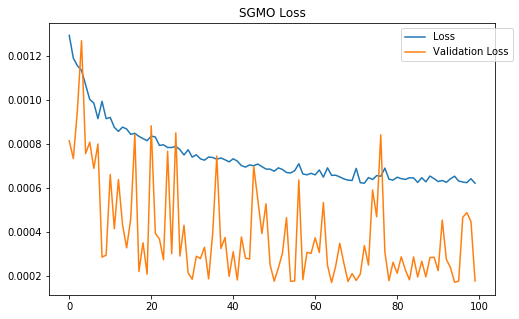

SGMO 0.5583638950076938 0.45820613046582537


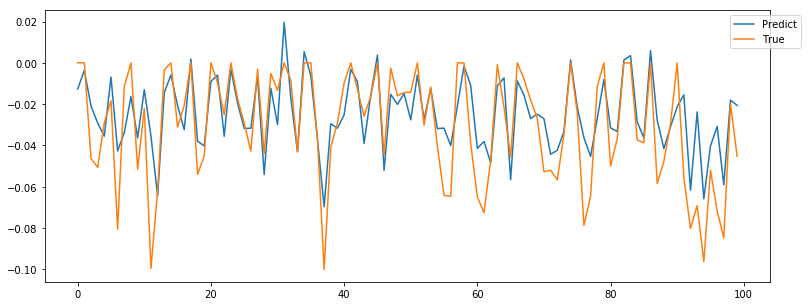

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


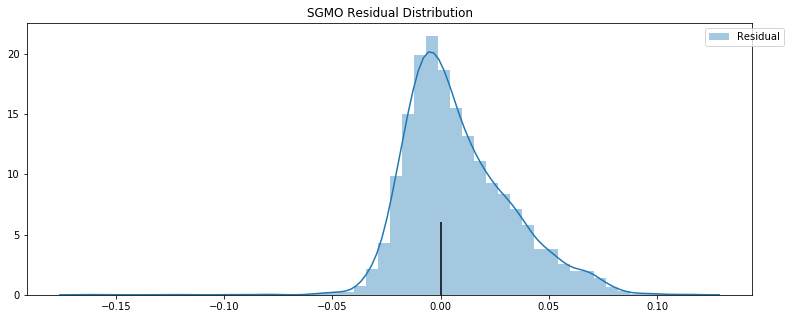

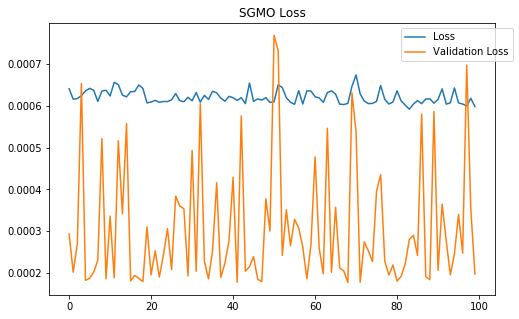

SGMO 0.511128128299207 0.41340976779681027


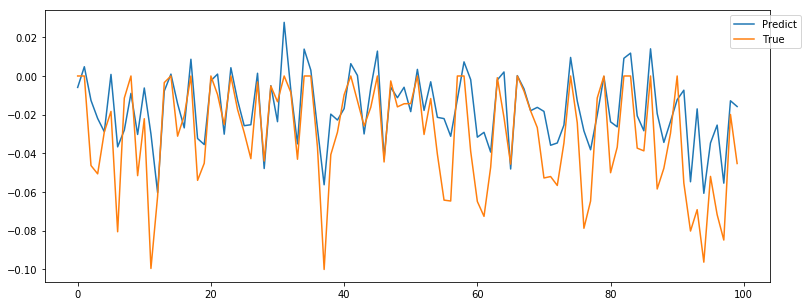

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


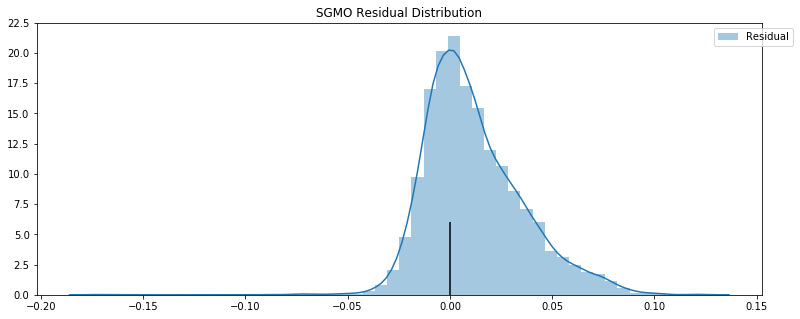

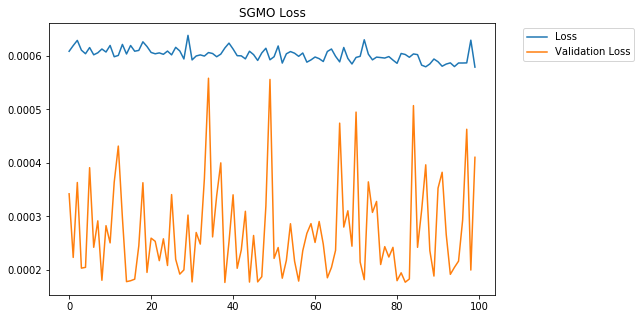

SGMO -0.01582314763505055 0.4976349559434129


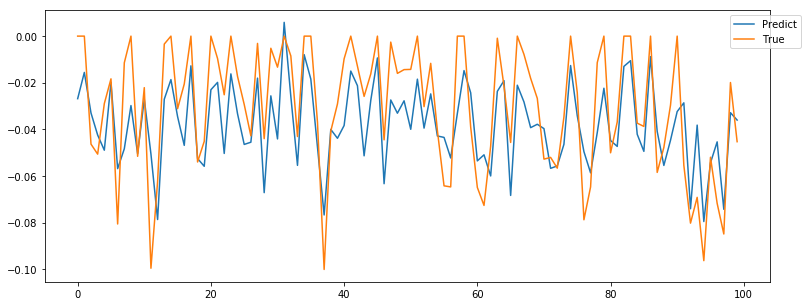

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


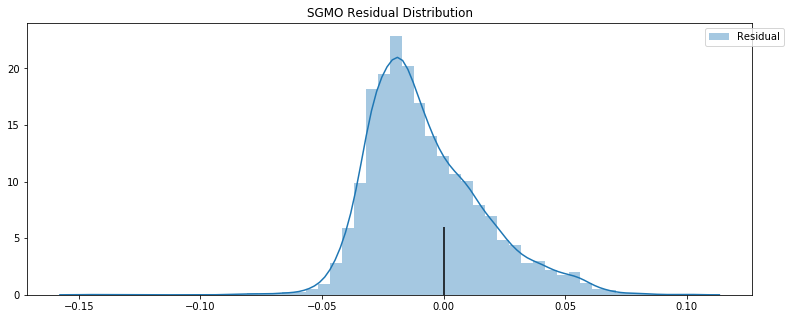

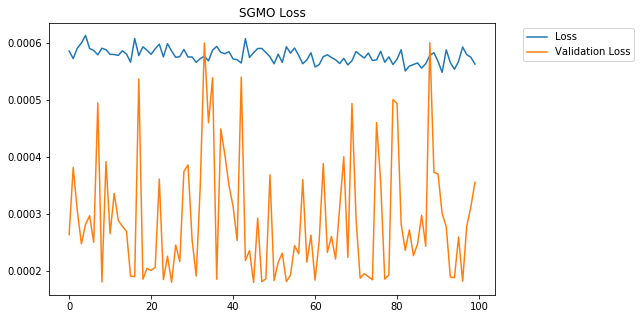

SGMO 0.12138974338288944 0.5280097509042225


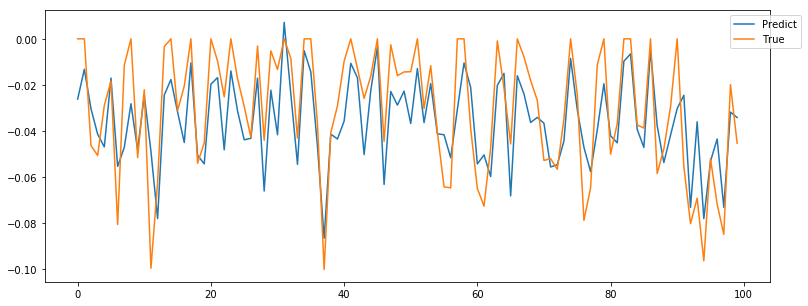

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


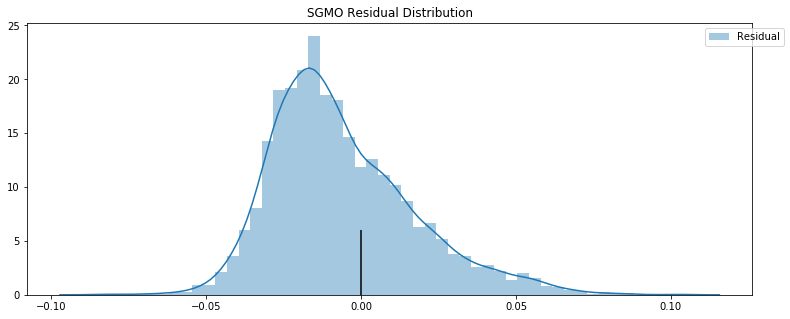

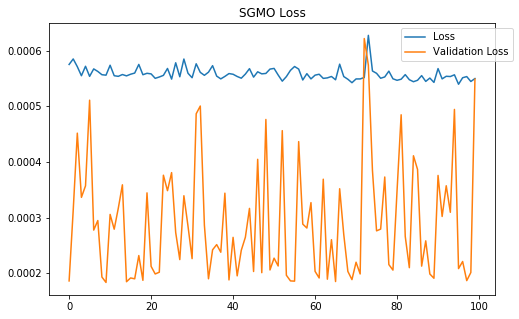

SGMO -0.3575380882759749 0.47170107309957765


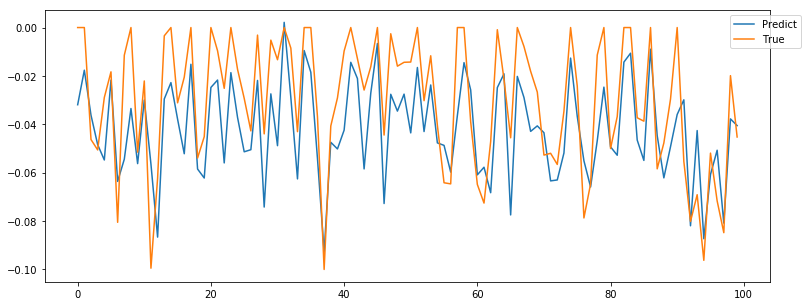

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


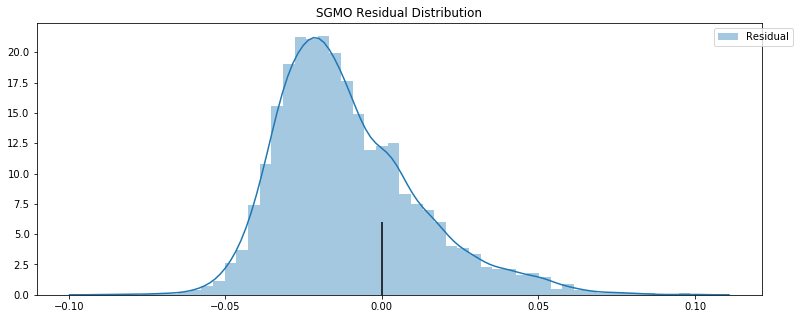

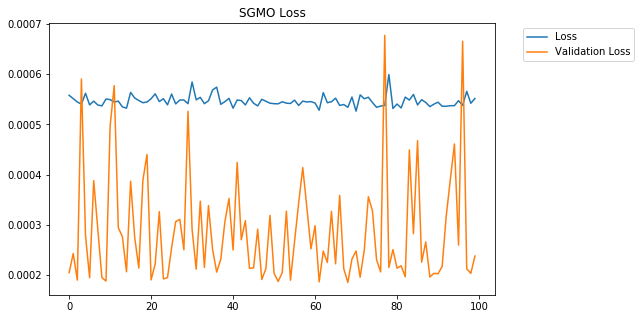

SGMO 0.4117905479753098 0.5773791828136231


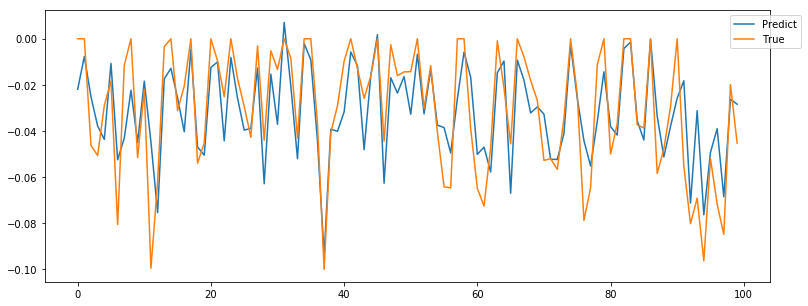

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


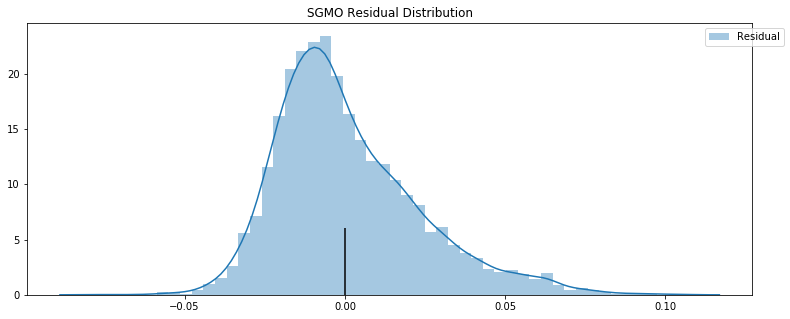

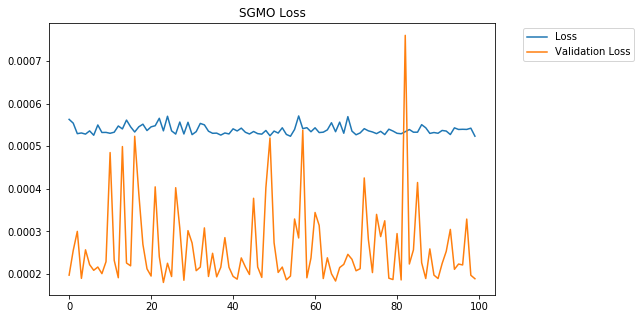

SGMO 0.5318258405453387 0.51521469843624


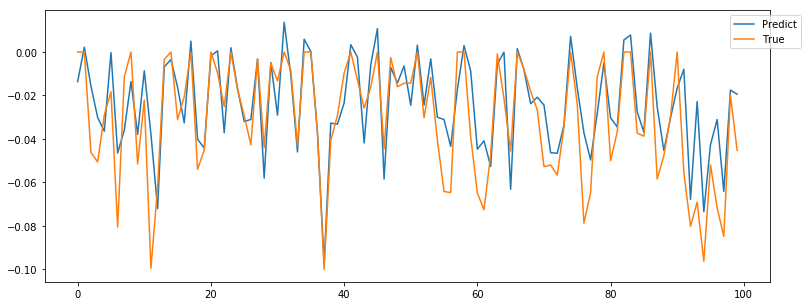

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


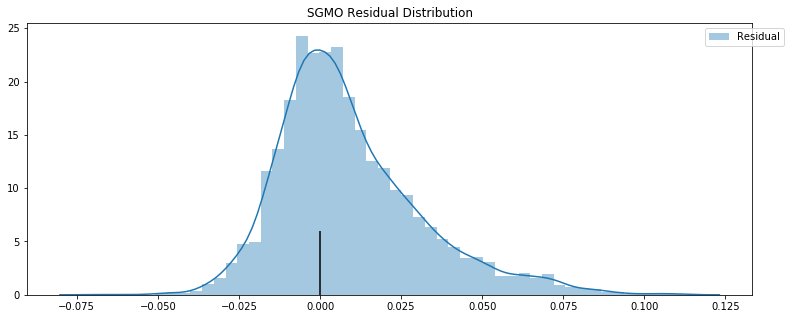

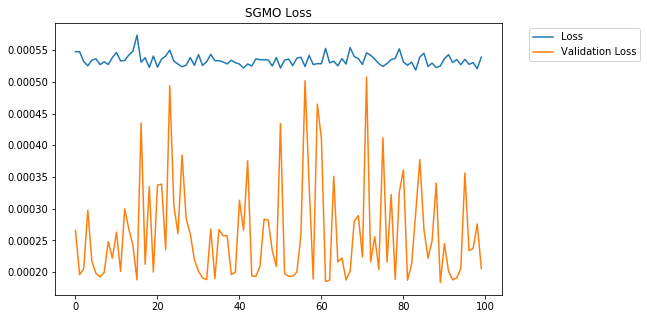

SGMO 0.49071743190764194 0.478543471679608


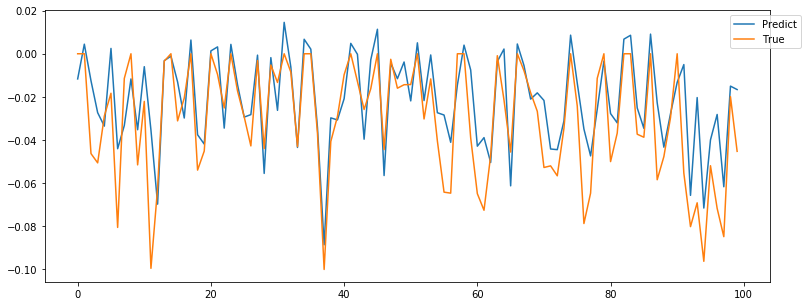

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


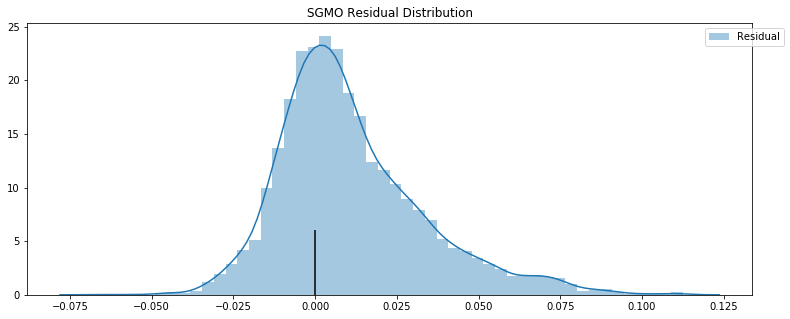

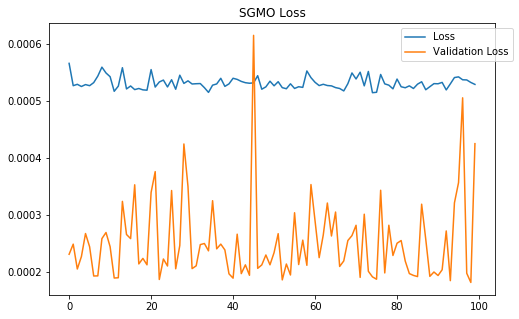

SGMO -0.05246972114600634 0.5215876425179979


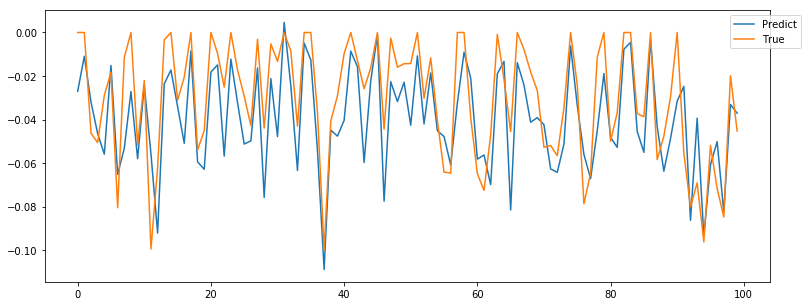

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


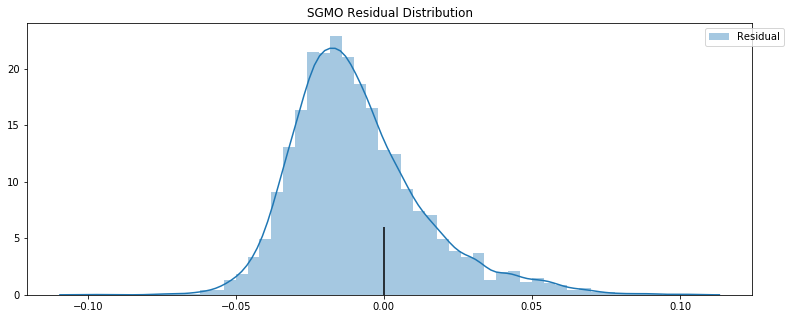

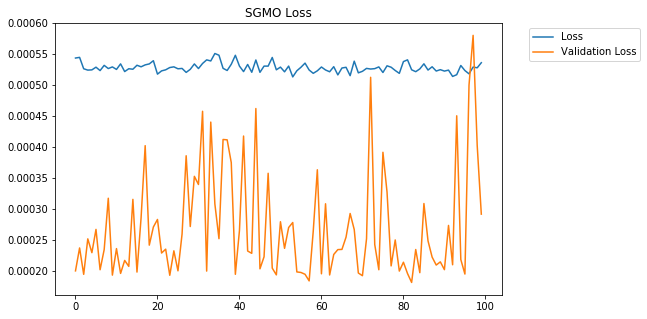

SGMO 0.2795123107867775 0.5790501766960852


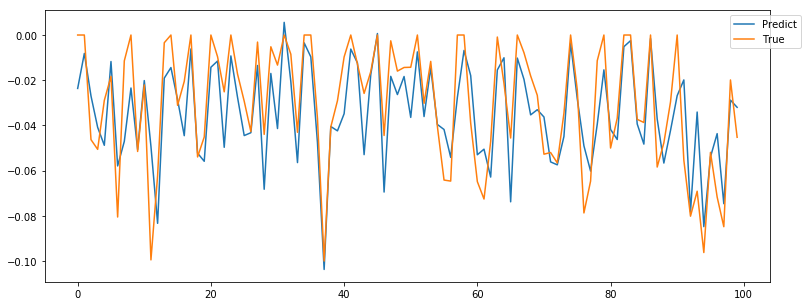

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


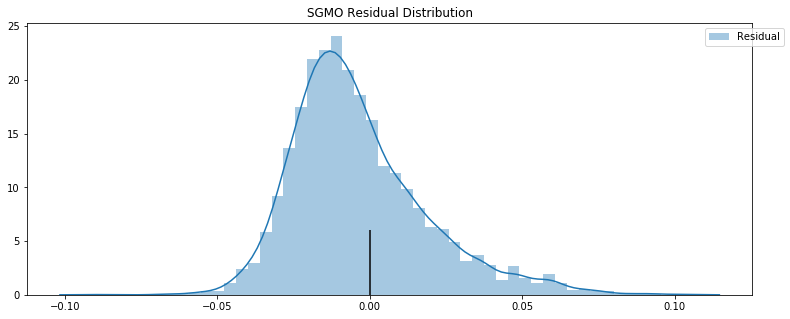

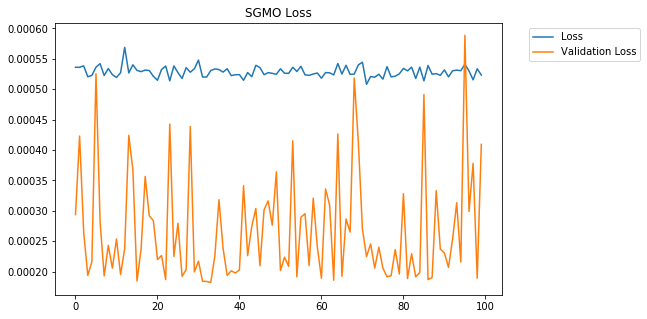

SGMO -0.01263085643175188 0.539618358174627


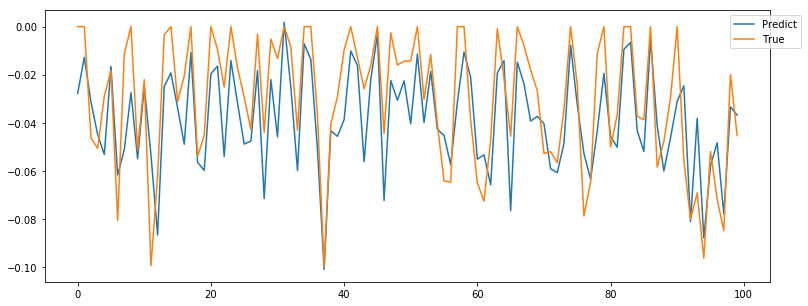

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


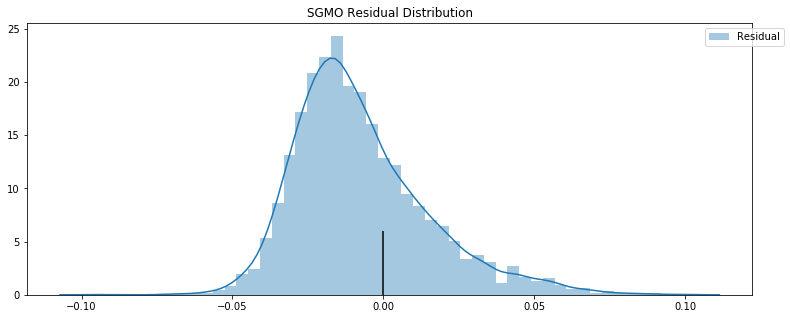

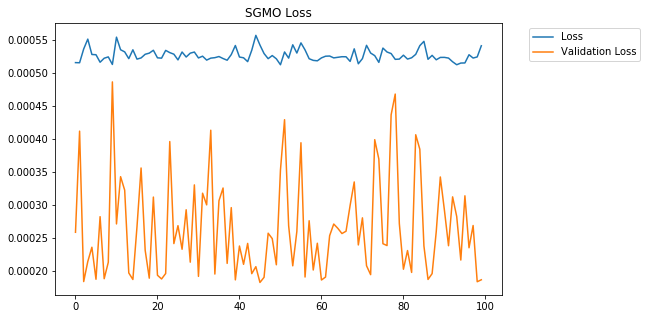

SGMO 0.5372720879719313 0.5730194442692931


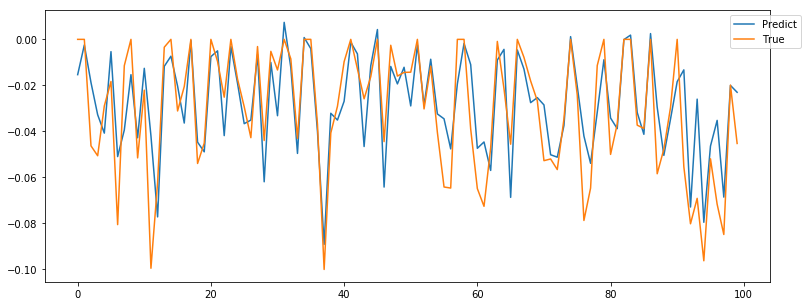

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


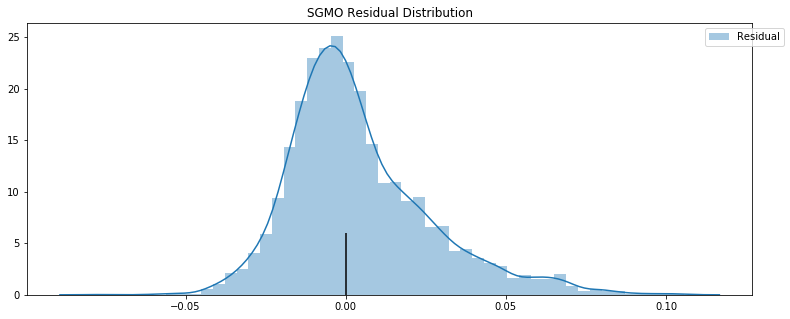

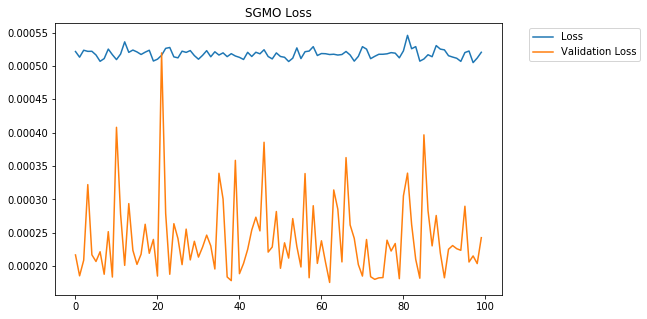

SGMO 0.40000670659868287 0.5979952657861258


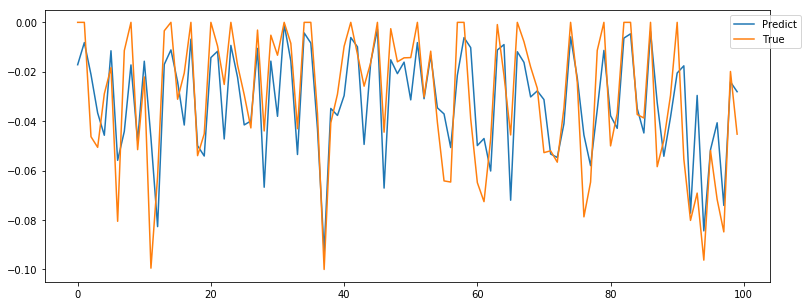

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


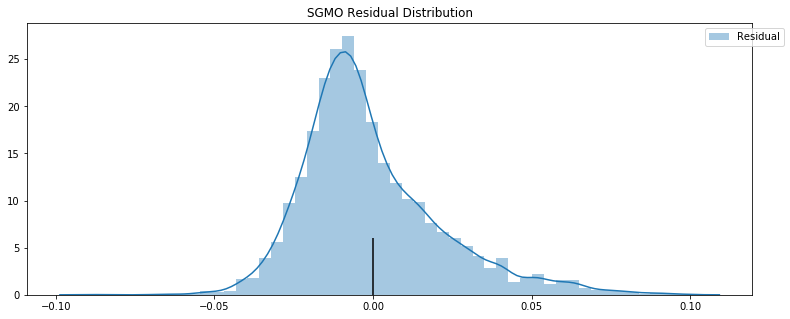

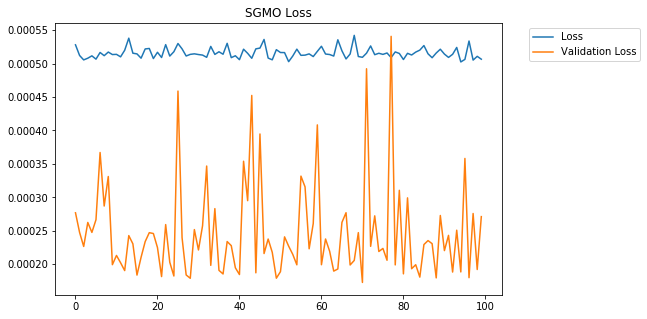

SGMO 0.3289841251157831 0.5869995389363629


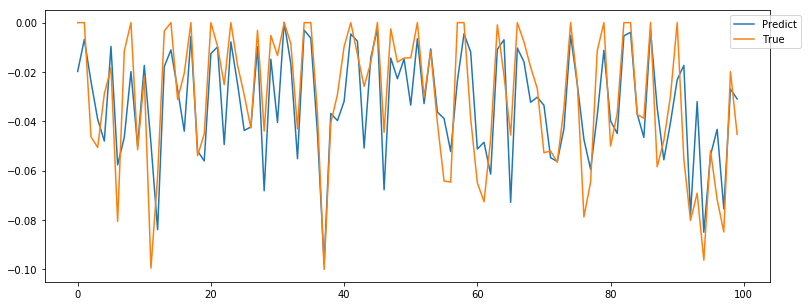

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


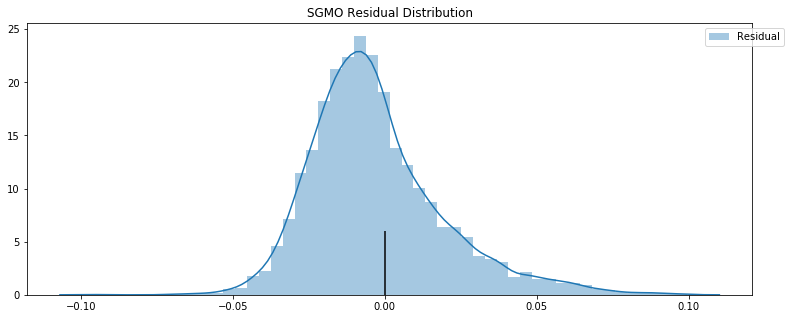

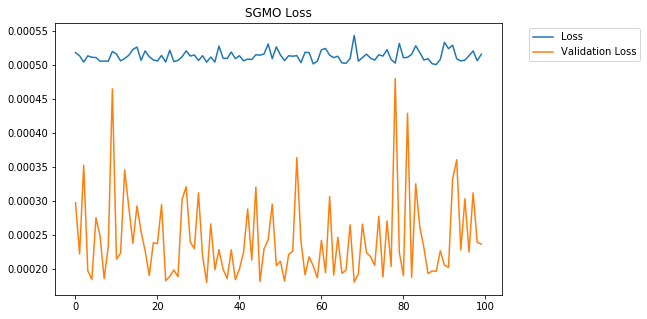

SGMO 0.4147990953909394 0.5923789240279289


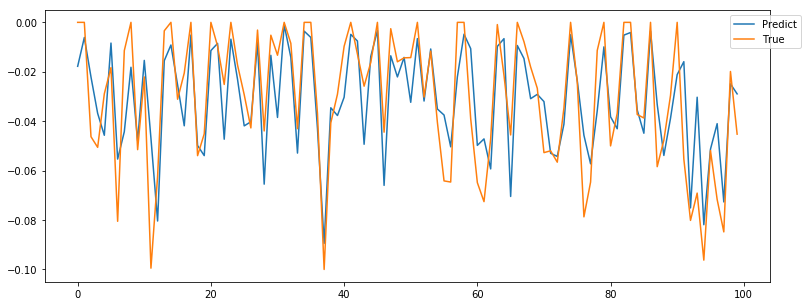

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


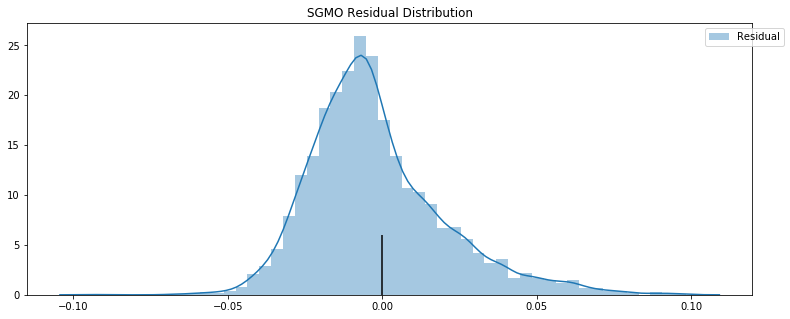

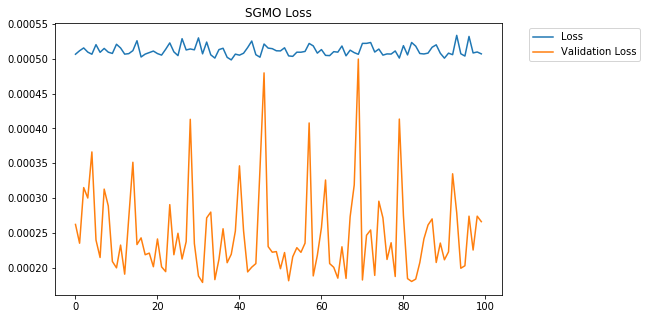

SGMO 0.3411714627223259 0.5996303304977271


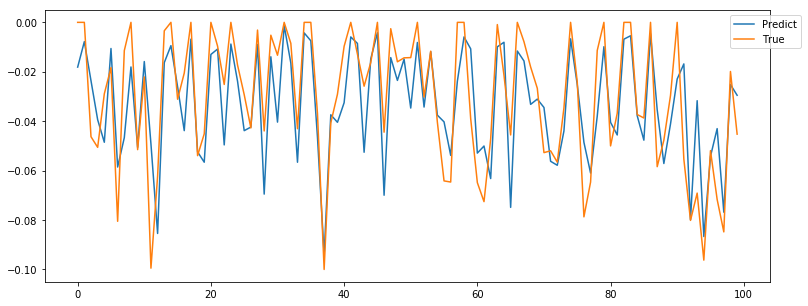

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


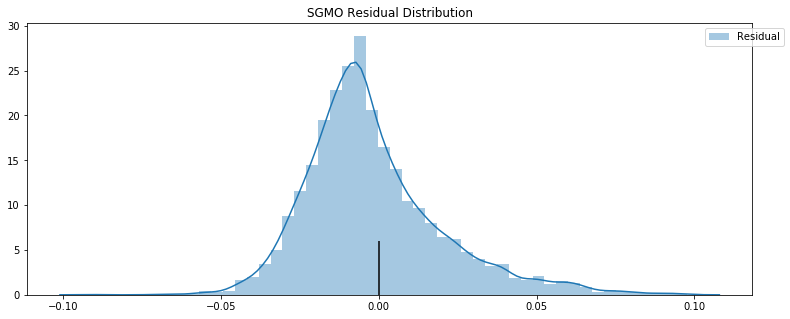

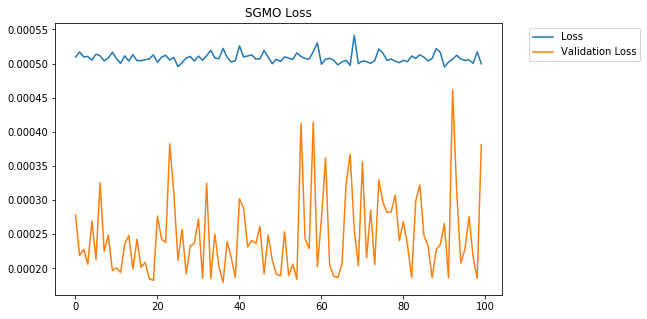

SGMO 0.0571156375270937 0.5729701207727569


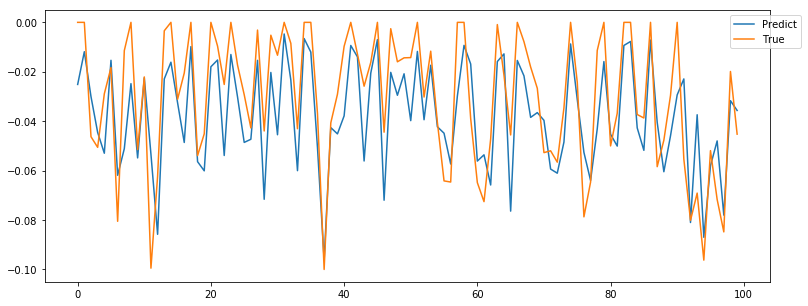

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


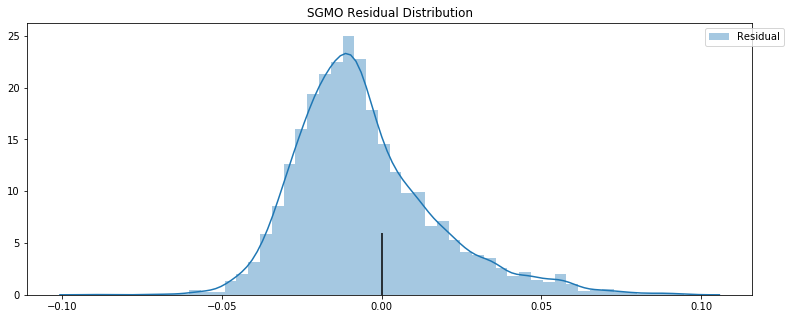

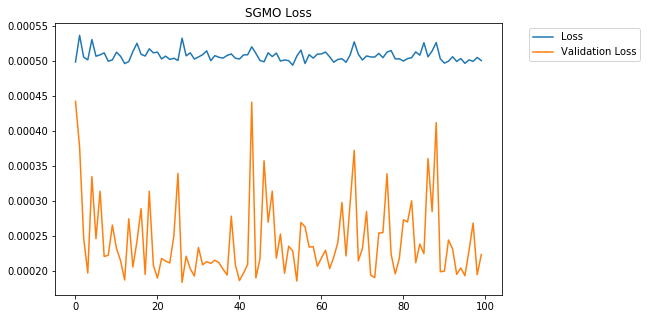

SGMO 0.44771466781398594 0.6020660036061494


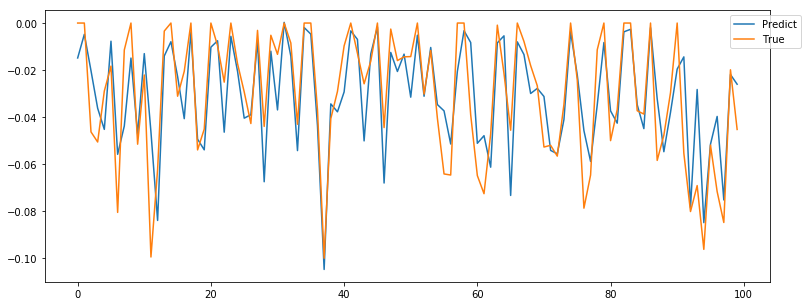

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


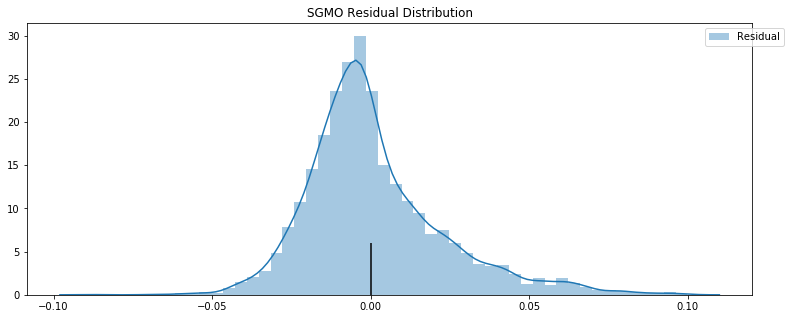

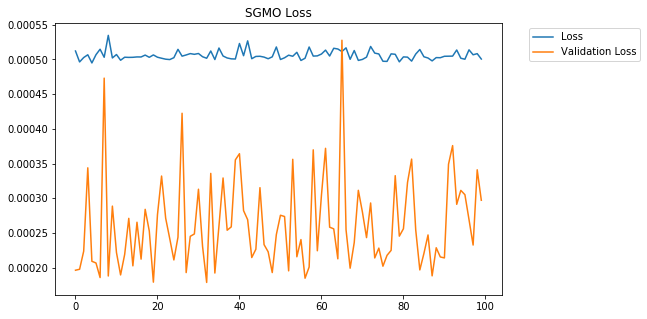

SGMO 0.264703655825141 0.5710686623558379


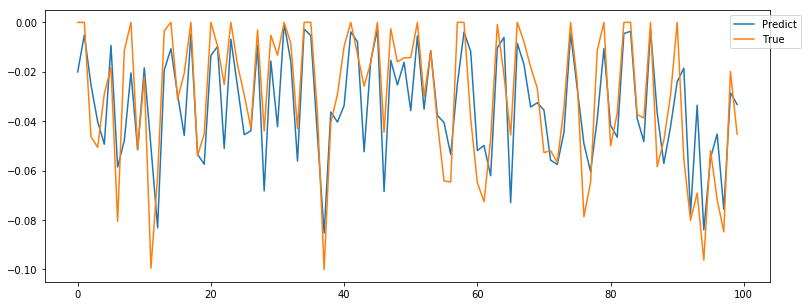

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


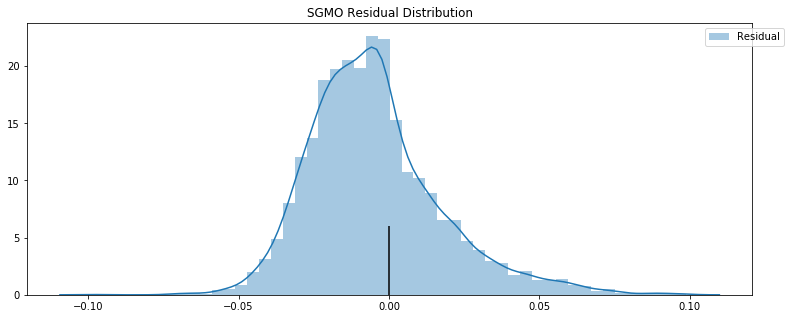

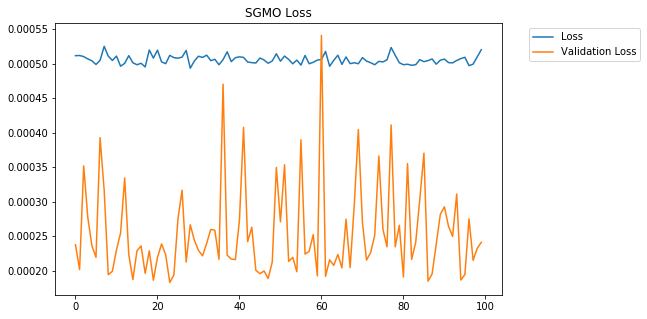

SGMO 0.40352840516204946 0.5962558796032569


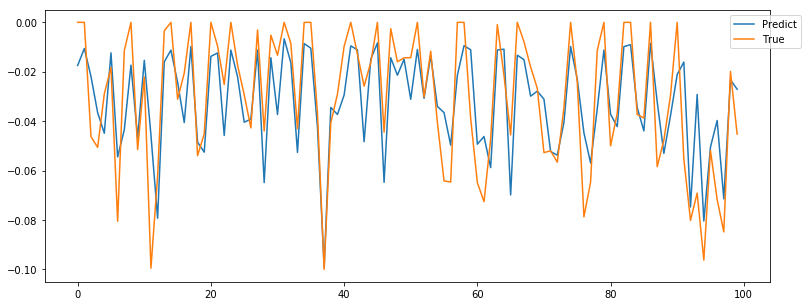

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


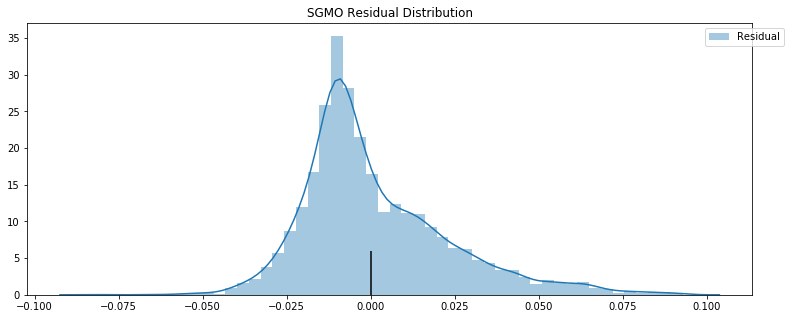

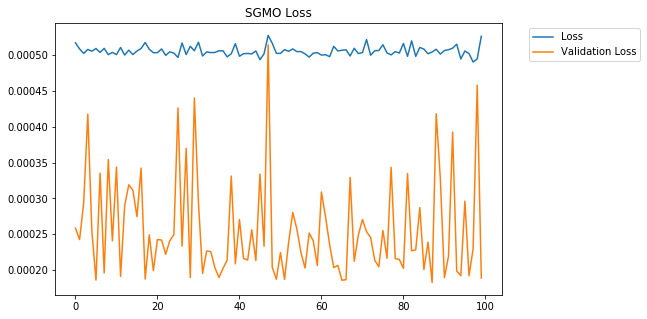

SGMO 0.5320856398580687 0.5773891406115126


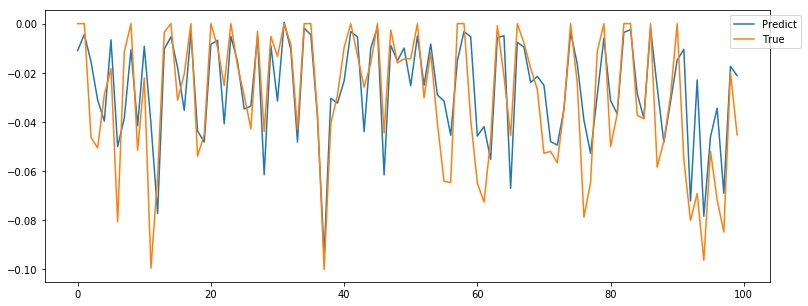

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


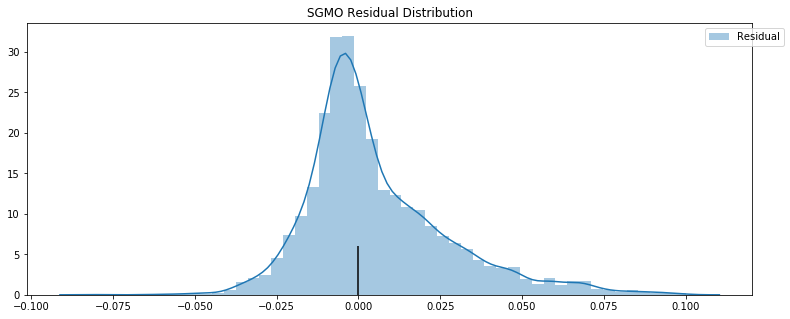

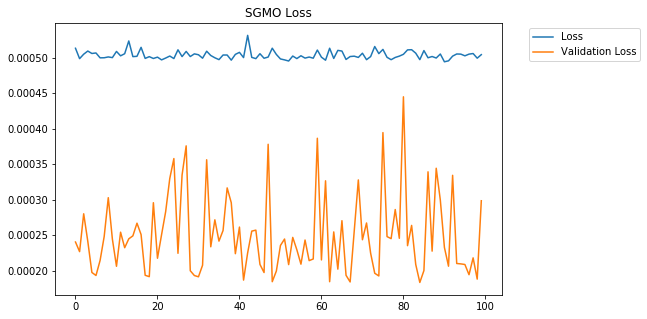

SGMO 0.26184677913752896 0.5993620864489886


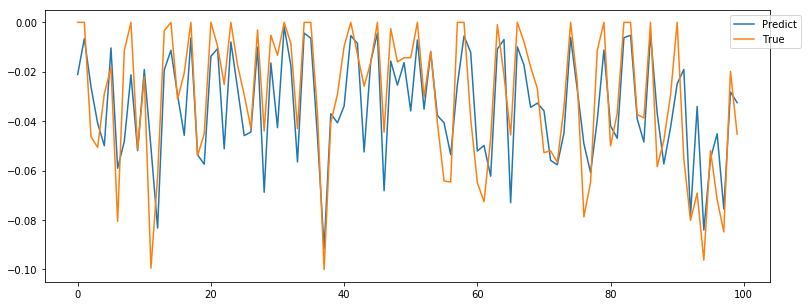

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


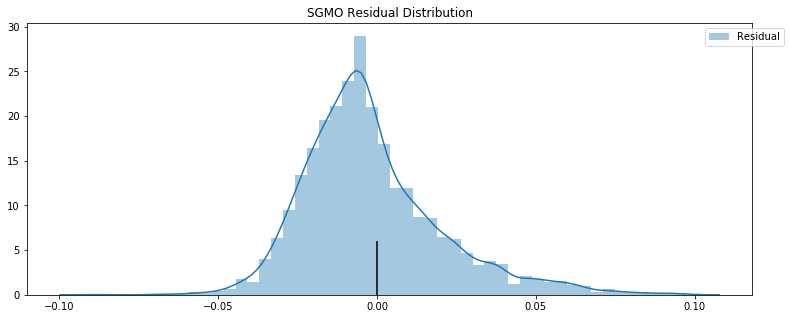

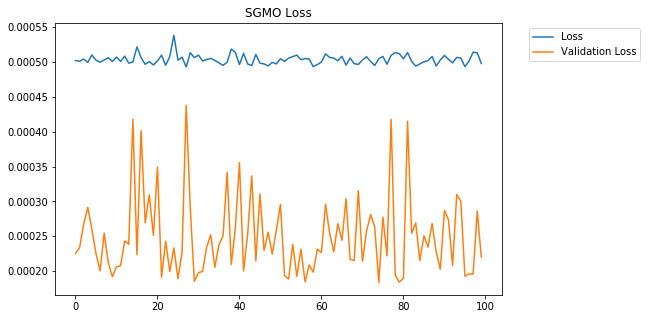

SGMO 0.45556456383304067 0.601163084648113


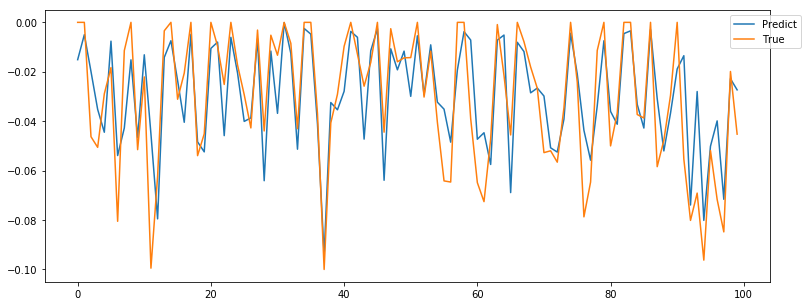

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


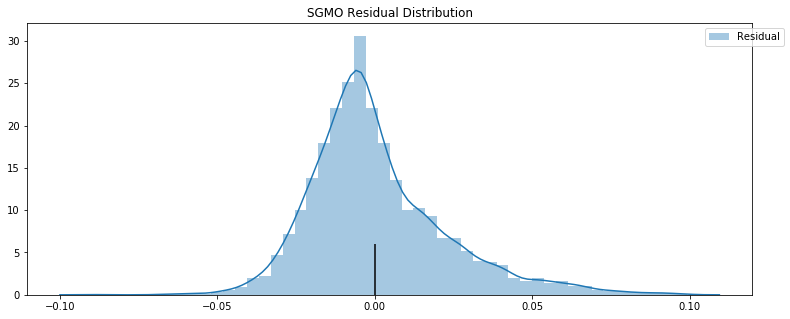

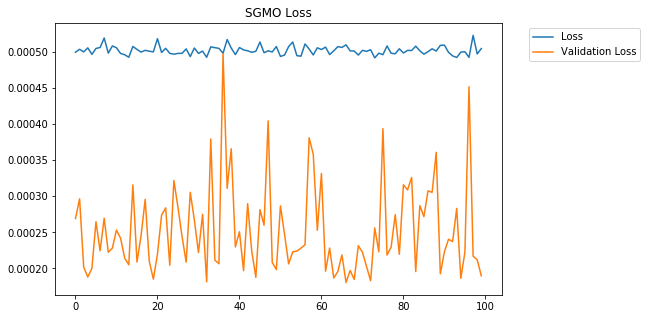

SGMO 0.5302066624303521 0.5903429576635595


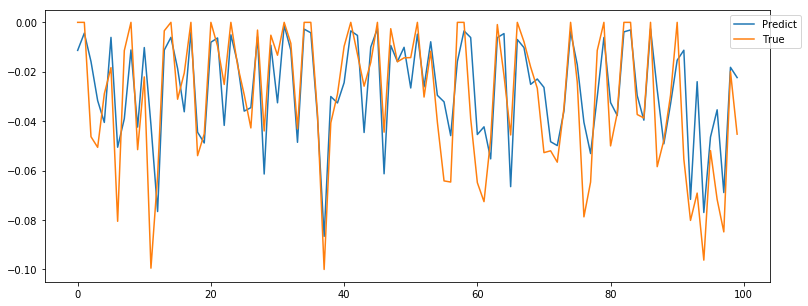

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


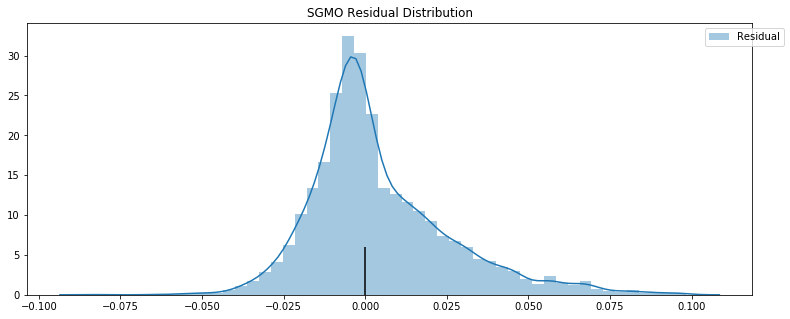

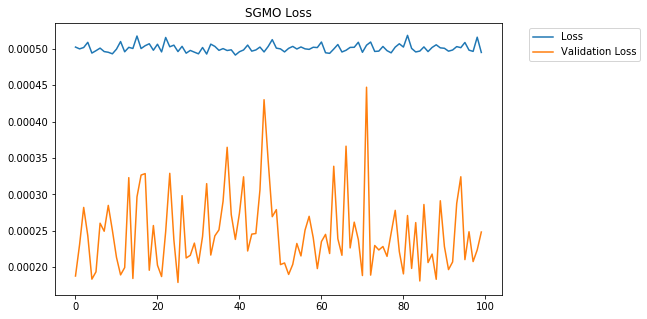

SGMO 0.38530660989014365 0.6057574284528211


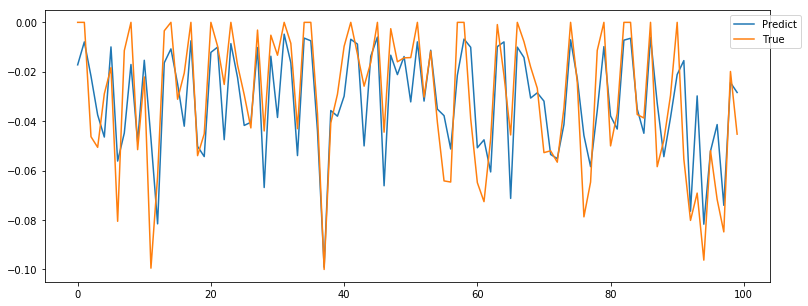

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


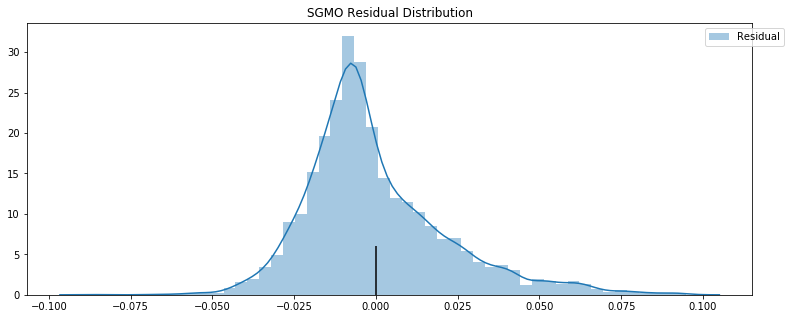

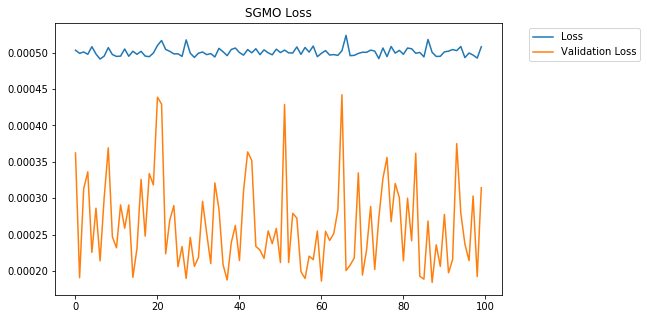

SGMO 0.22232134846234486 0.5959987155773587


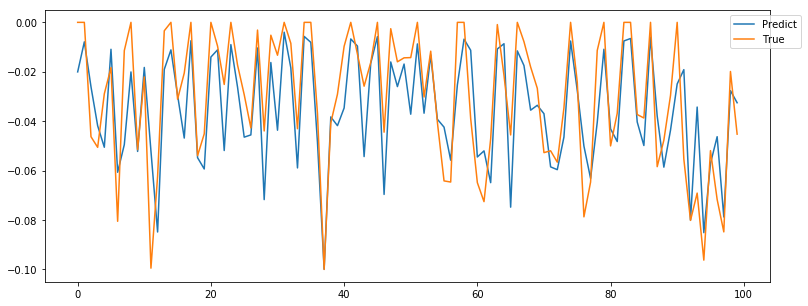

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


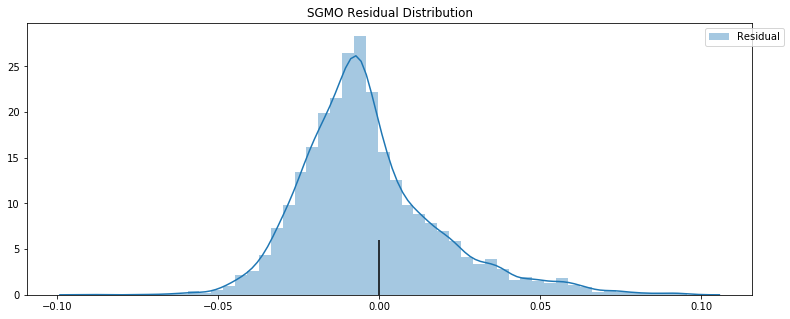

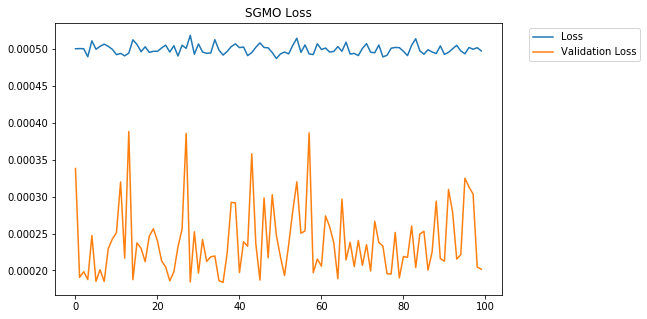

SGMO 0.5012342232185056 0.5935340993040921


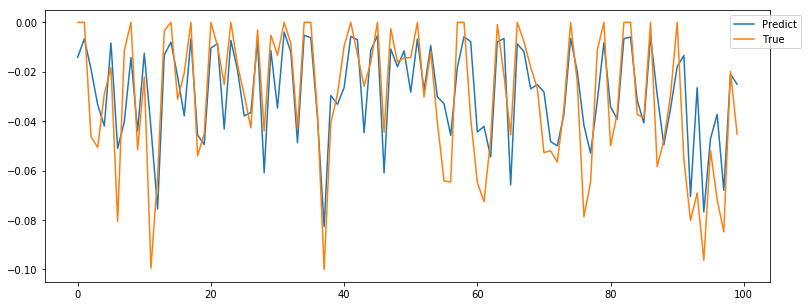

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


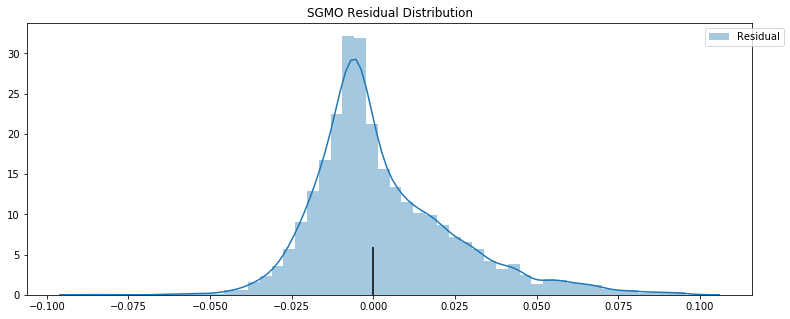

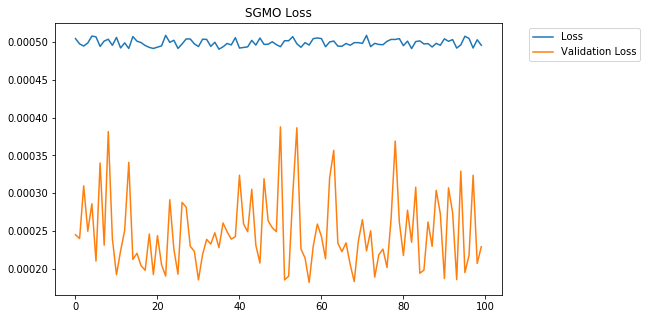

SGMO 0.4326456741488962 0.6071728492045408


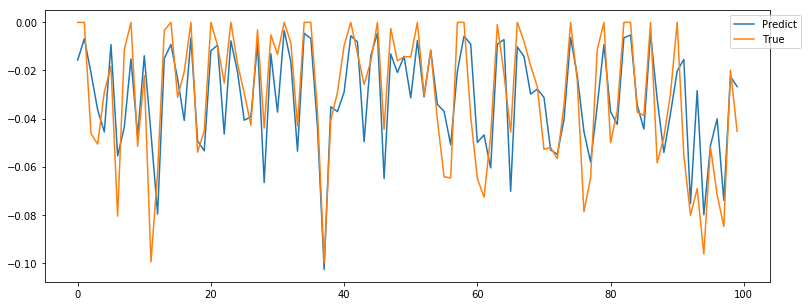

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


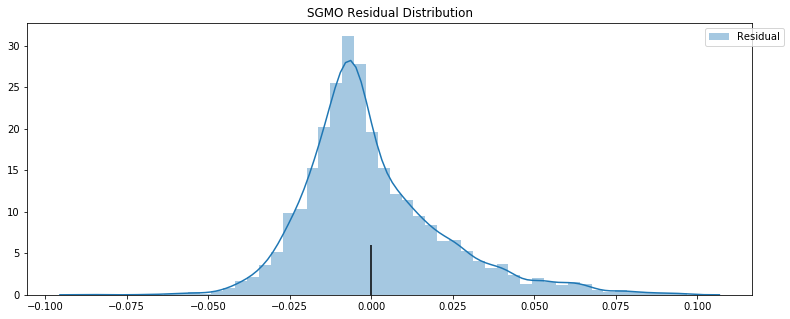

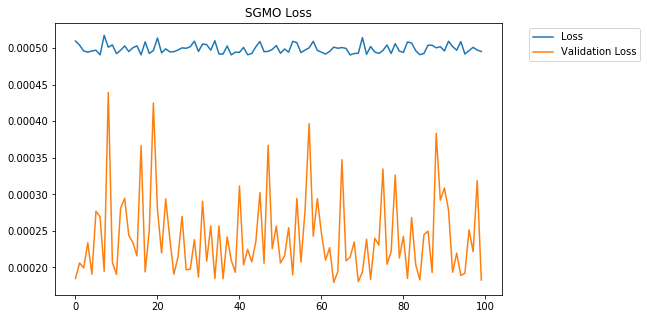

SGMO 0.5474713089653955 0.5573612178577647


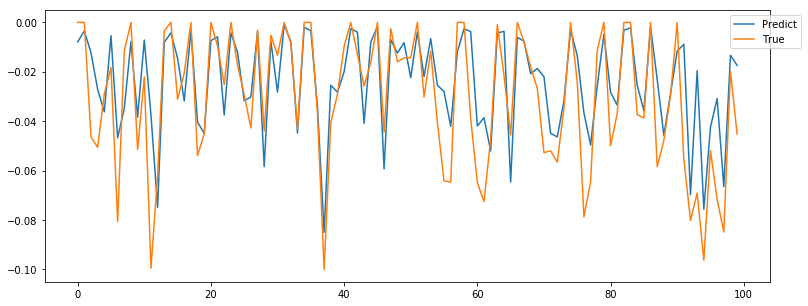

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


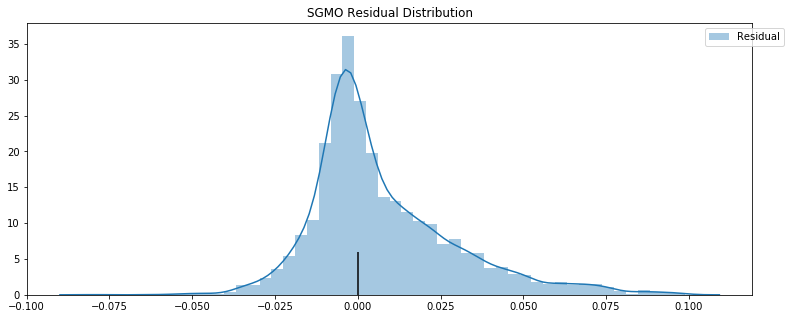

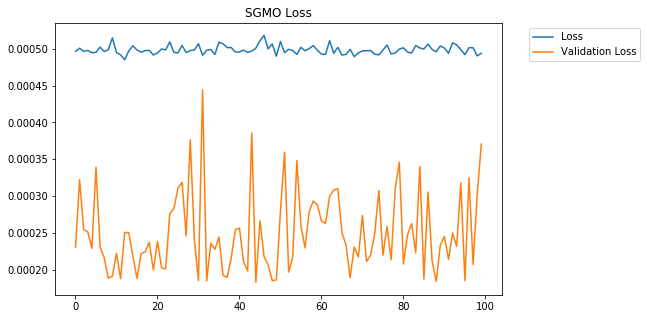

SGMO 0.08303942175549173 0.5674702125803273


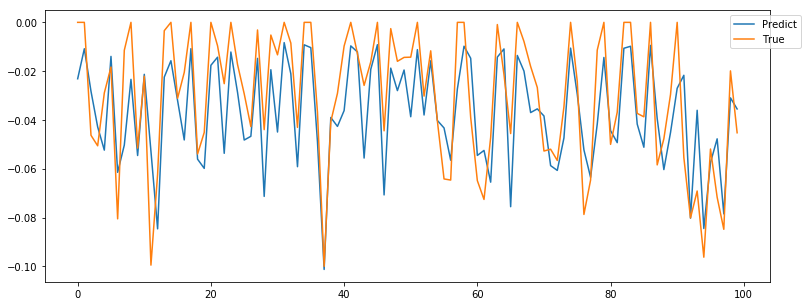

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


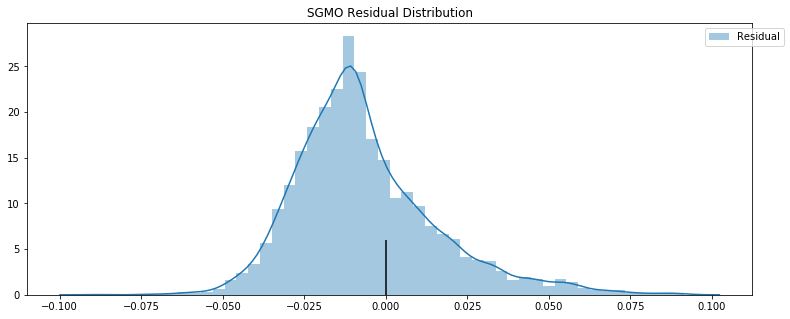

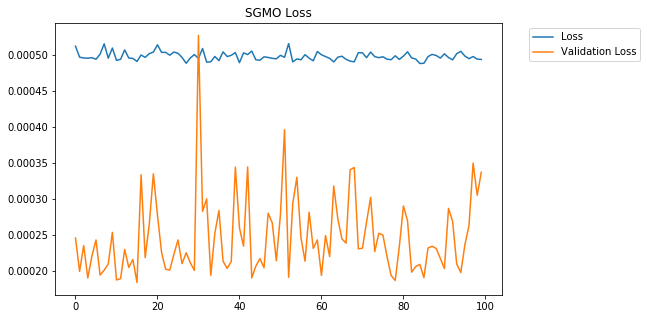

SGMO 0.16692340604423062 0.5835066980050562


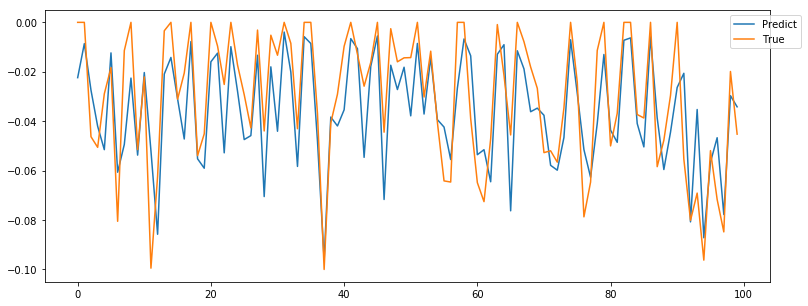

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


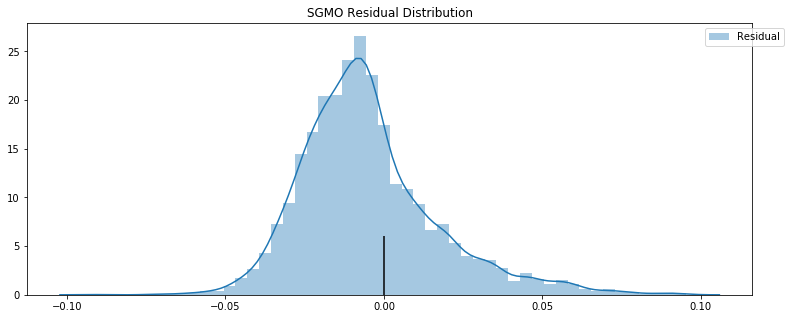

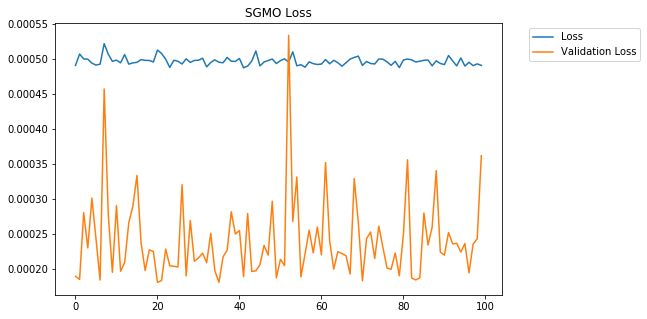

SGMO 0.10489413484792076 0.573347827587368


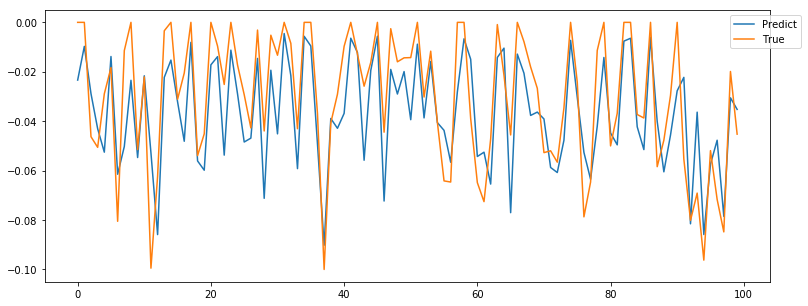

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


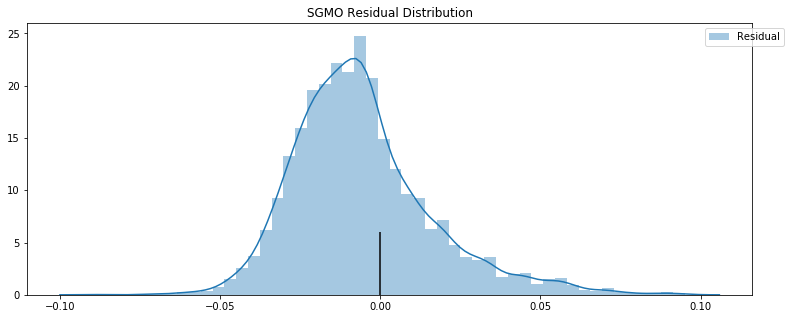

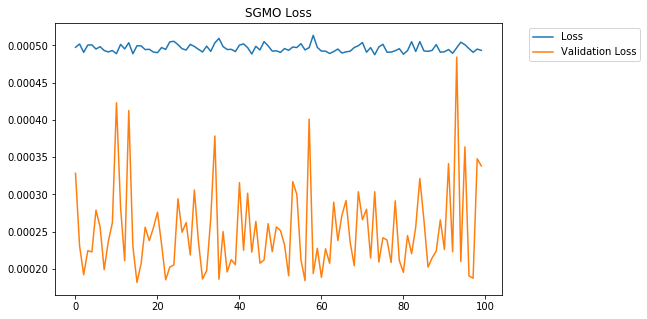

SGMO 0.16338788078461497 0.5862225119961528


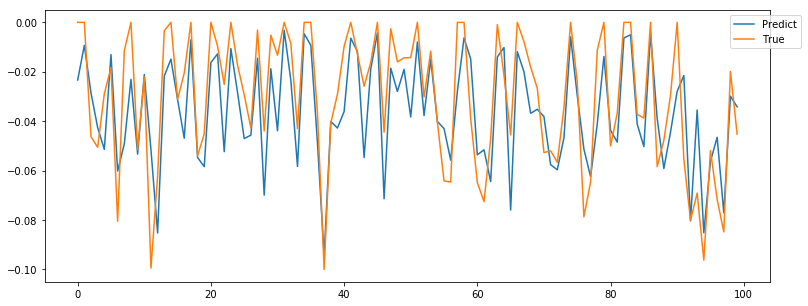

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


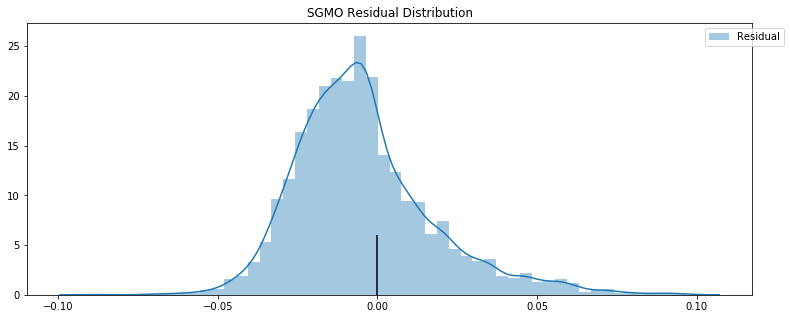

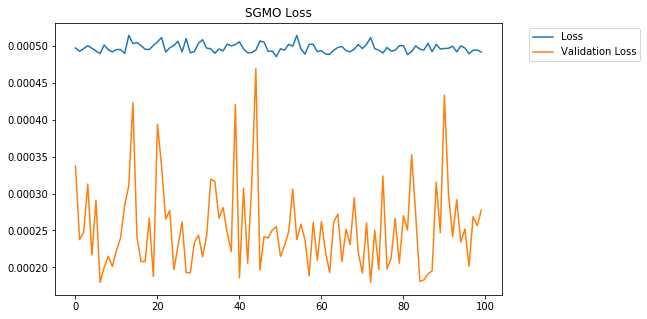

SGMO 0.3136776957844216 0.6029144855091451


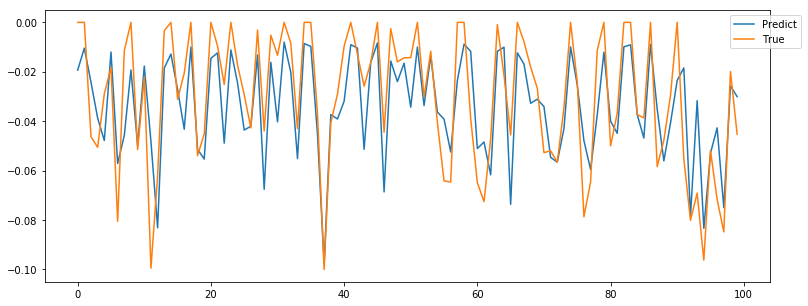

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


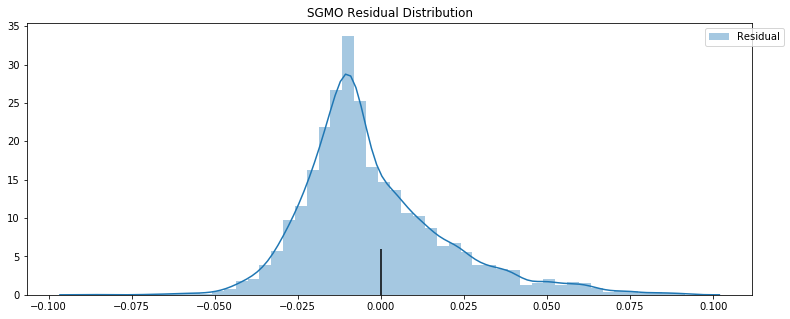

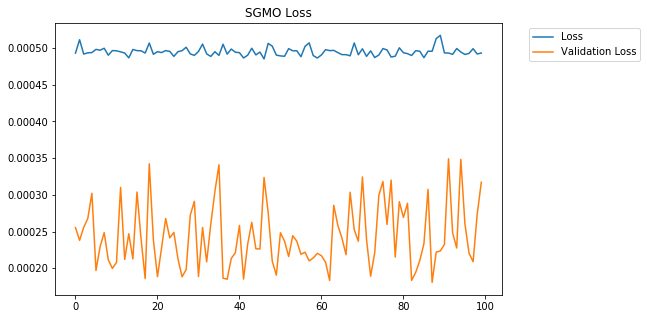

SGMO 0.2152208635623376 0.5923569197282701


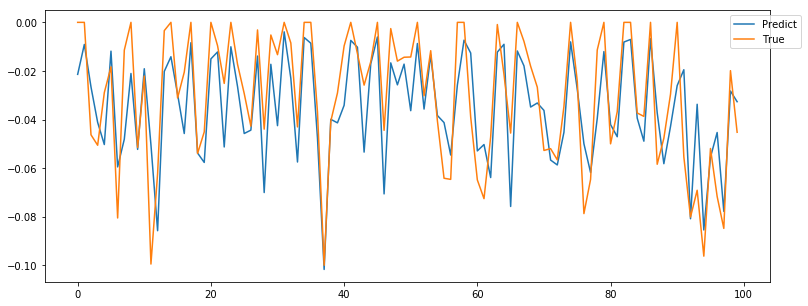

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


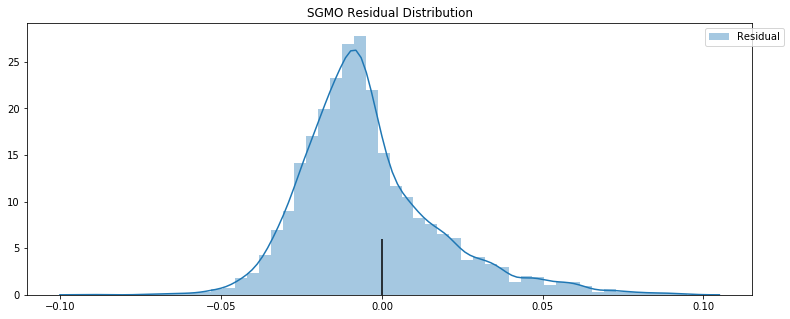

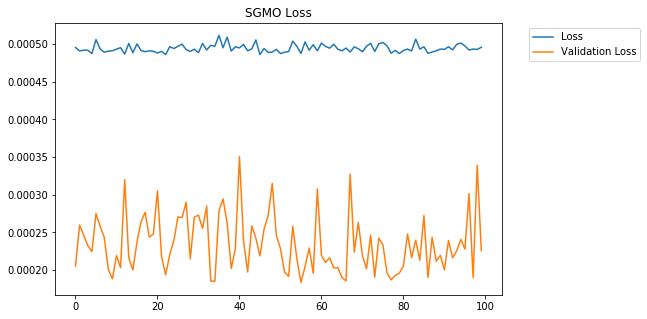

SGMO 0.4411057600997351 0.6067882426874054


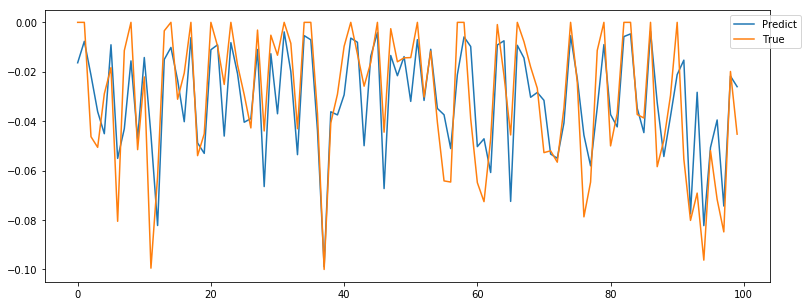

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


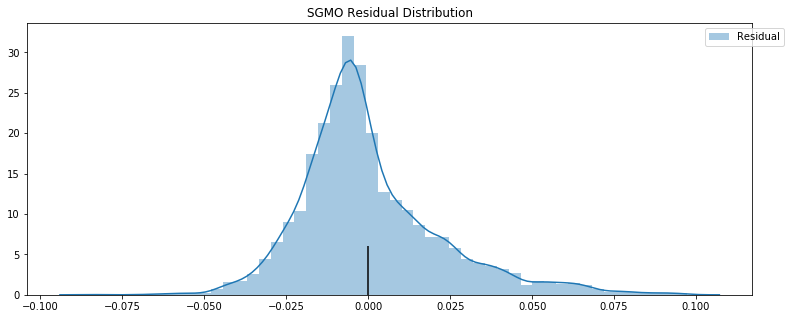

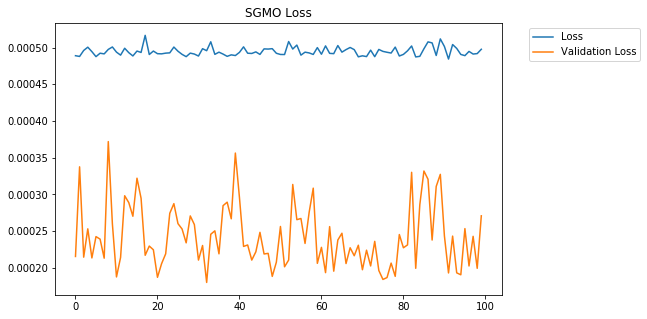

SGMO 0.32981285493905477 0.6065933770511298


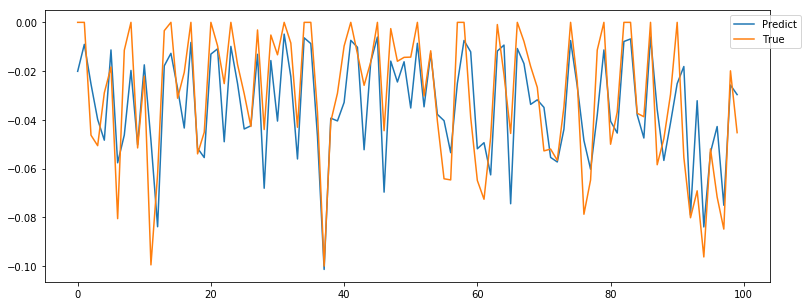

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


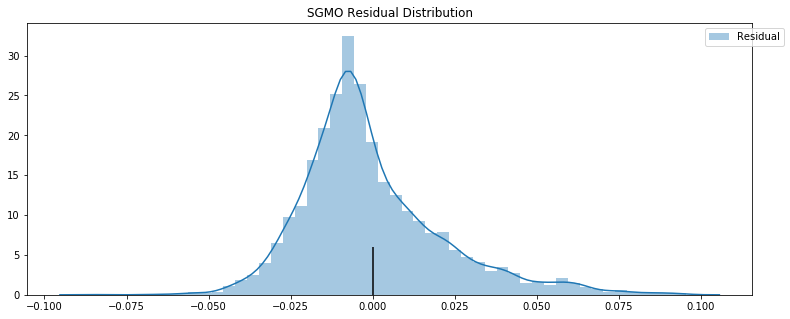

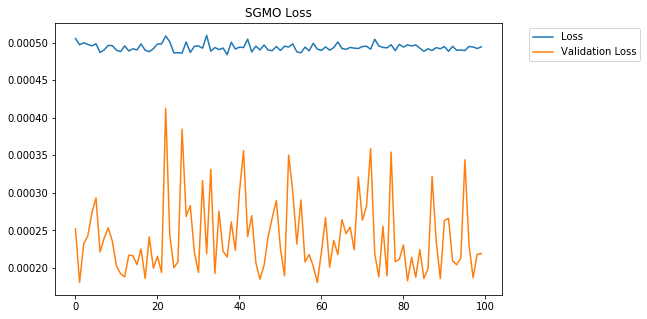

SGMO 0.4579984647566767 0.6029689253282873


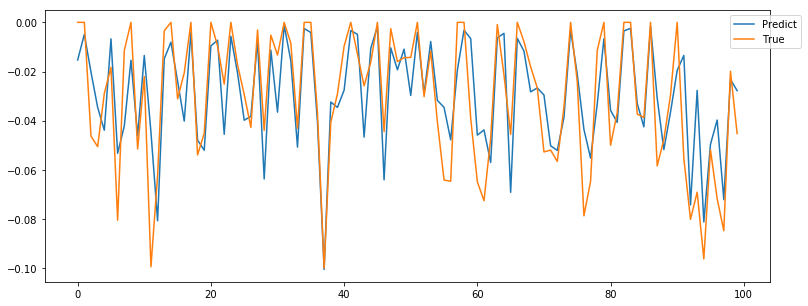

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


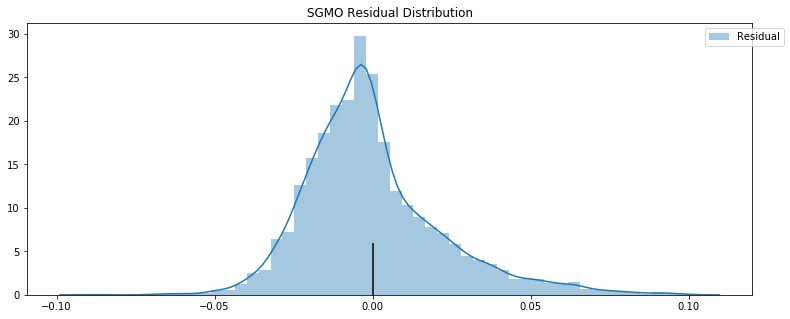

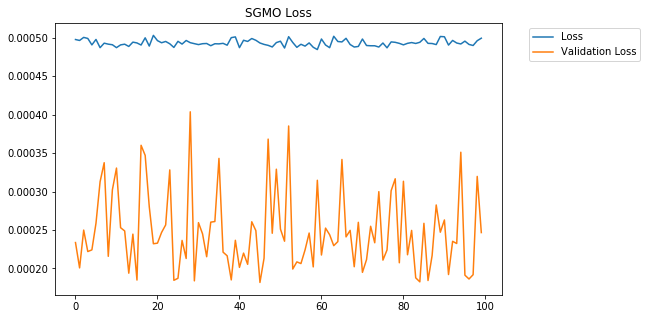

SGMO 0.38978950460039963 0.6034765712090477


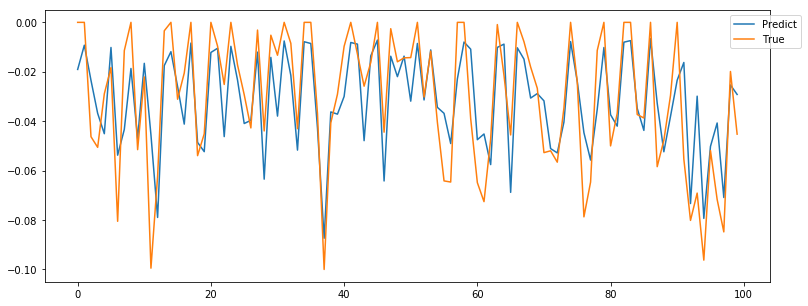

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


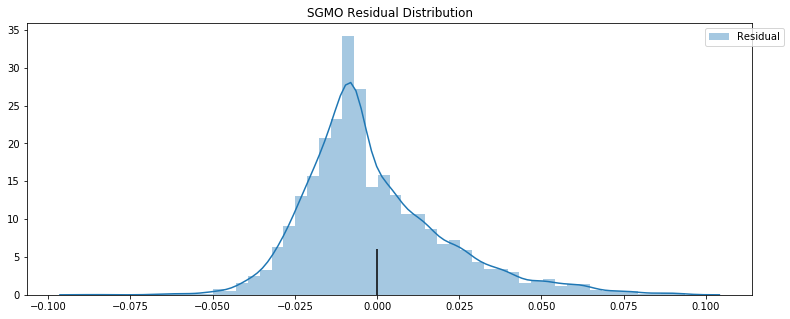

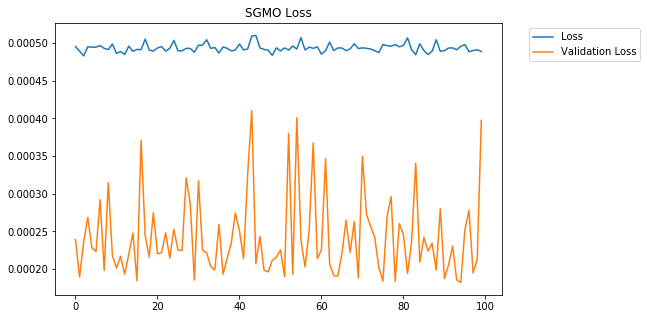

SGMO 0.01658837130914148 0.5592400023257204


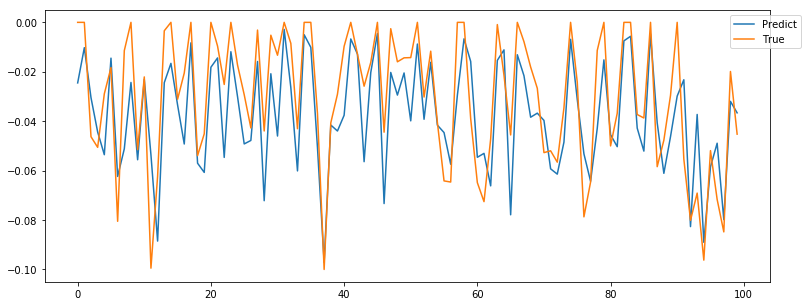

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


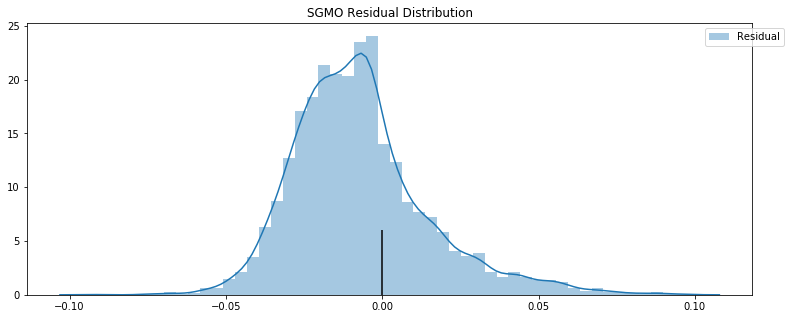

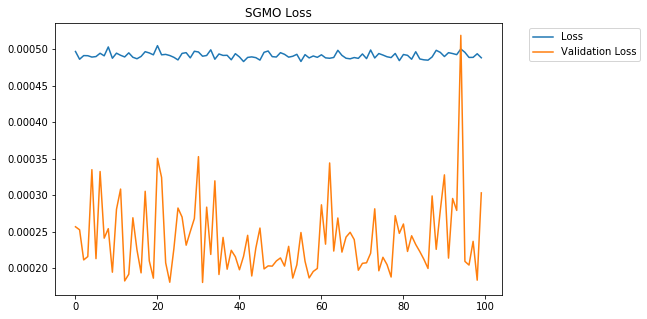

SGMO 0.24961730519646552 0.6008139131924954


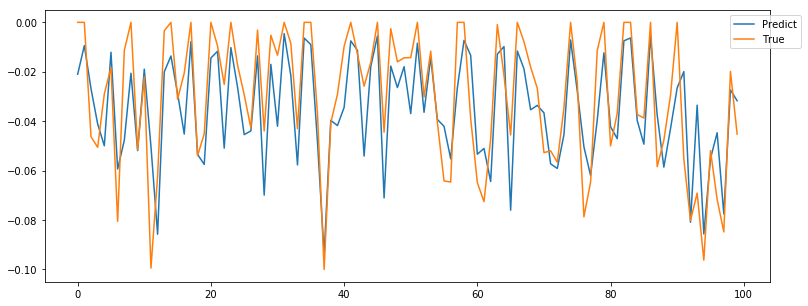

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


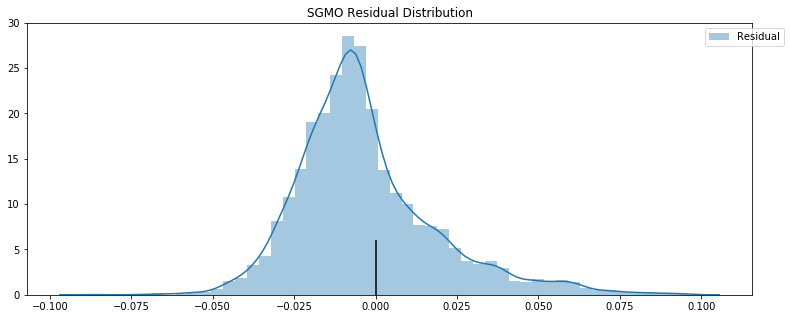

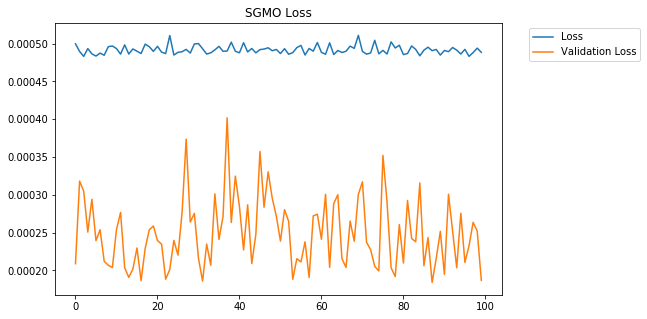

SGMO 0.5374316854506629 0.5971261571594354


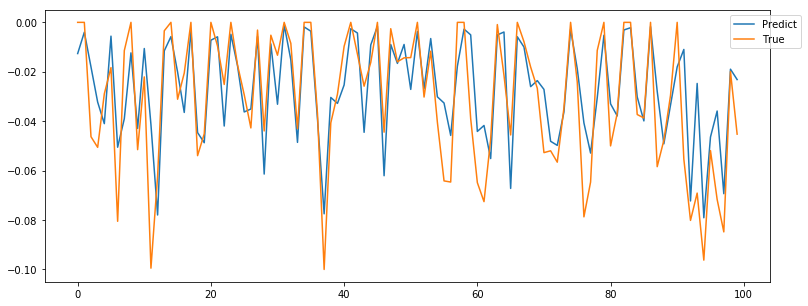

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


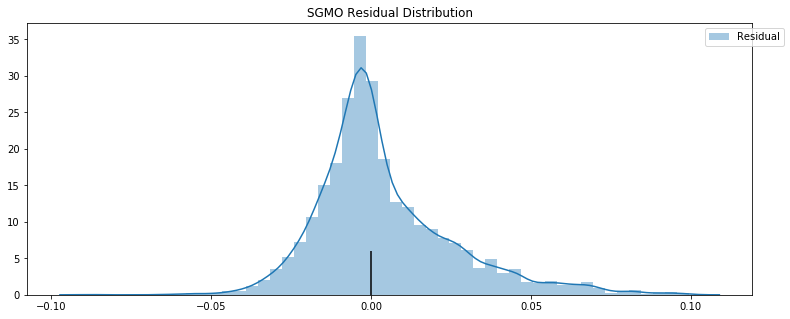

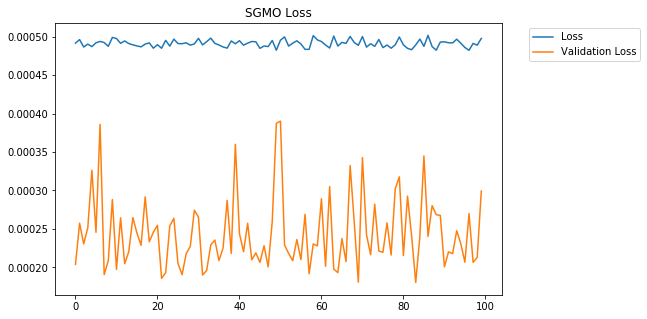

SGMO 0.2594141317097459 0.6040210444973088


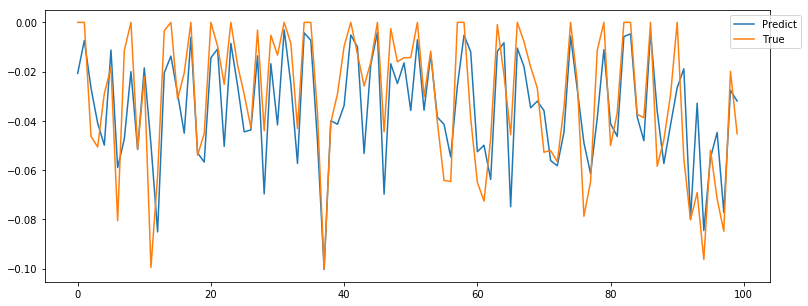

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


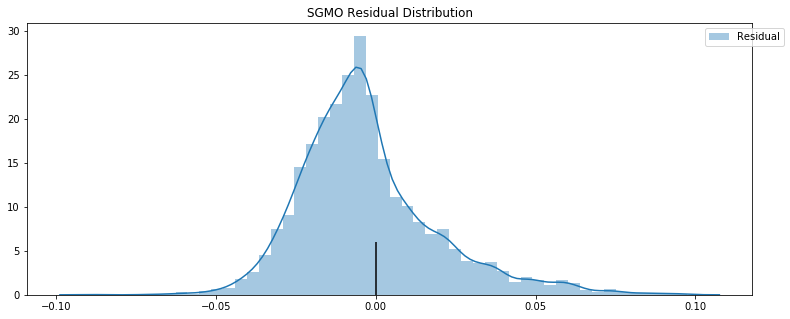

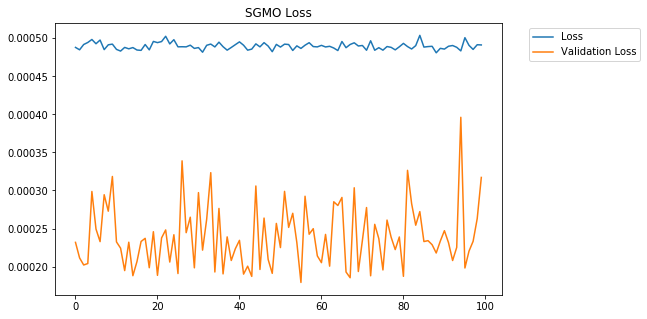

SGMO 0.21527108758033742 0.6019175025744145


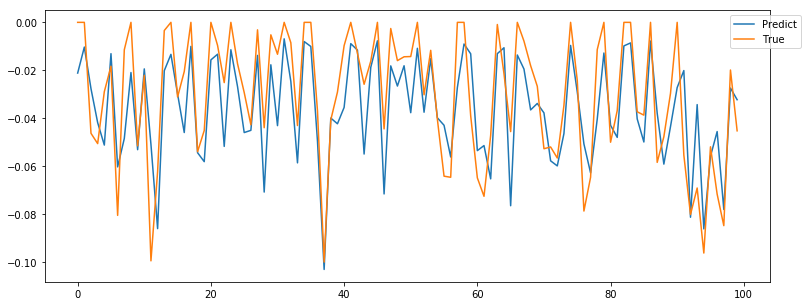

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


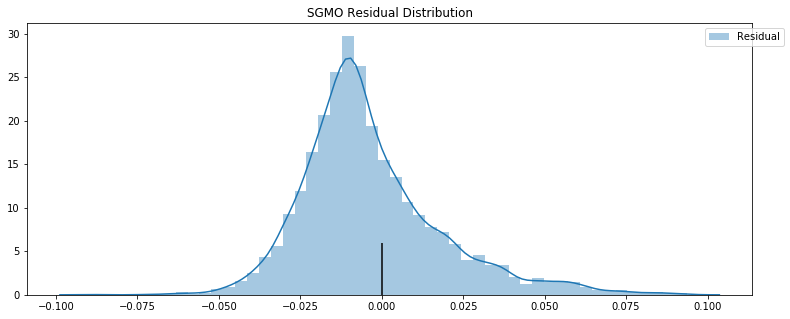

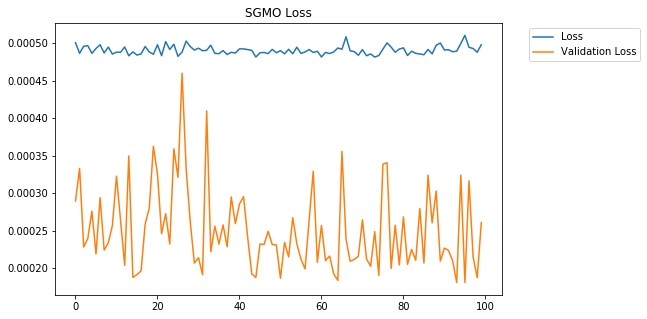

SGMO 0.35471827542792633 0.6117869153582309


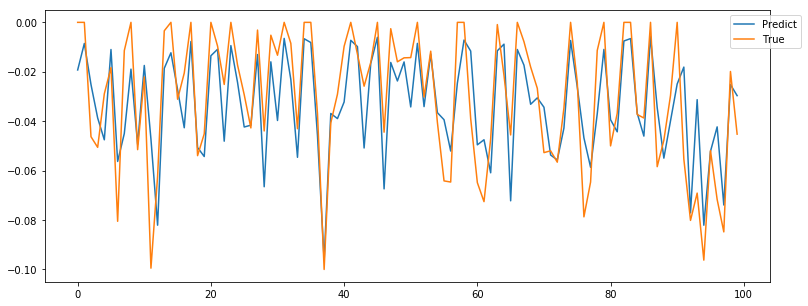

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


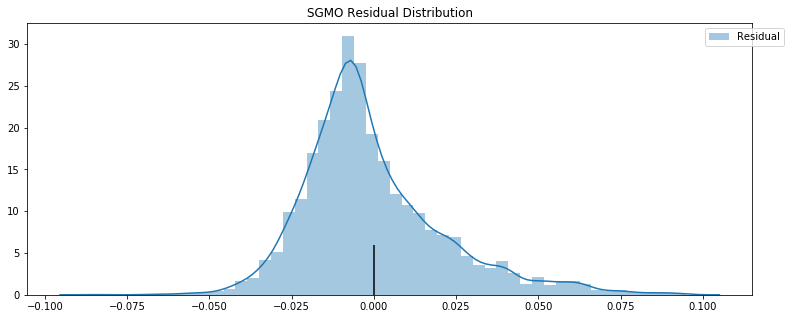

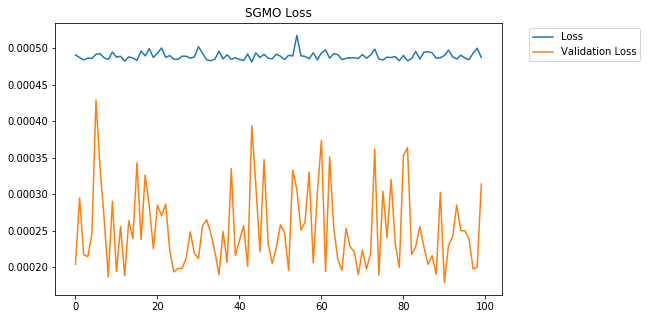

SGMO 0.22349915888600436 0.5979303447638862


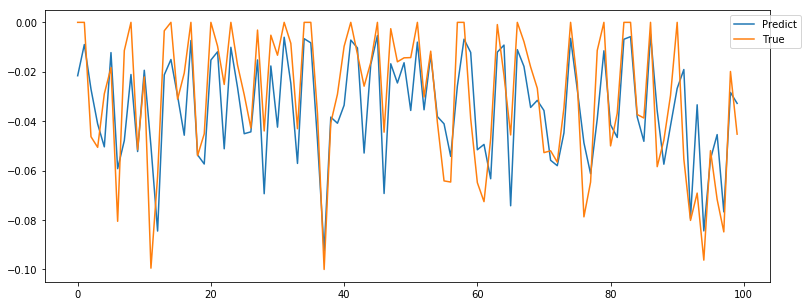

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


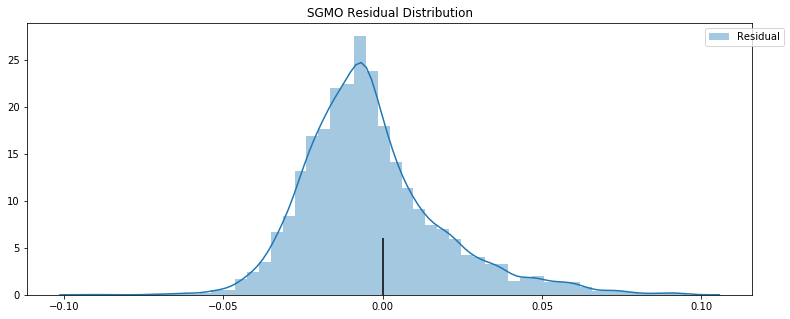

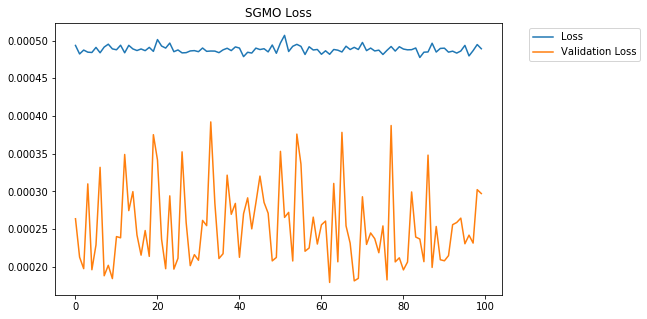

SGMO 0.2646367756985152 0.5994397093028903


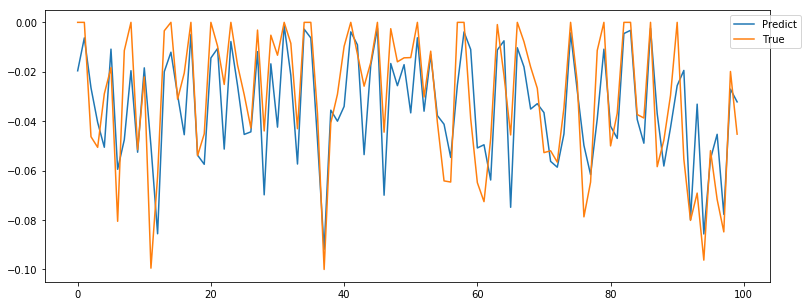

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


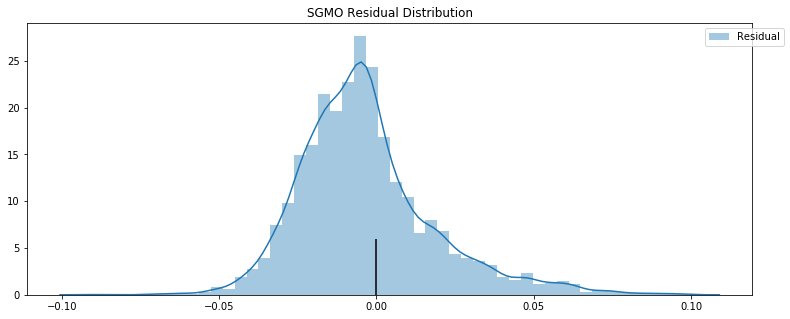

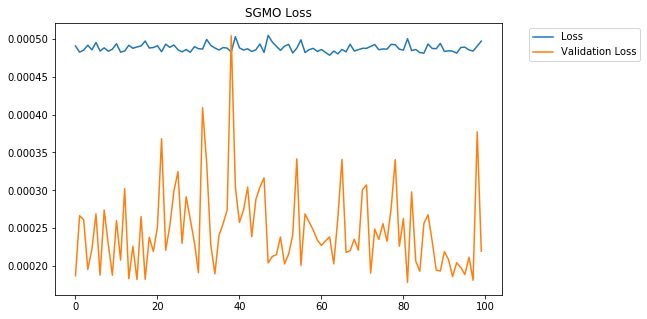

SGMO 0.4569512140277384 0.6129153663074196


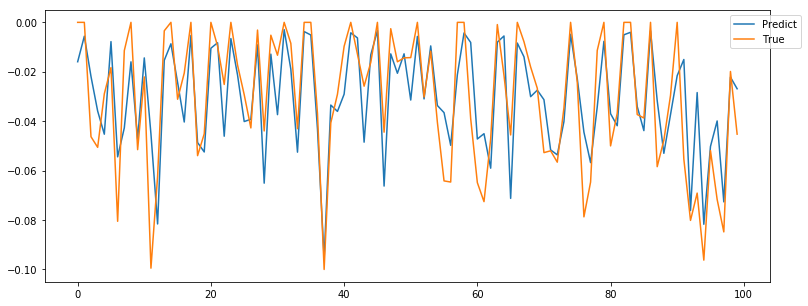

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


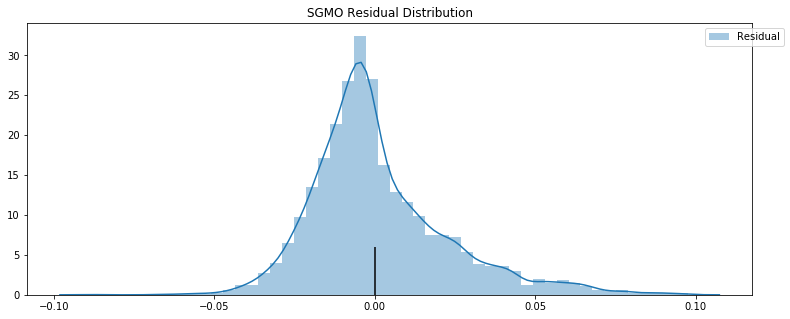

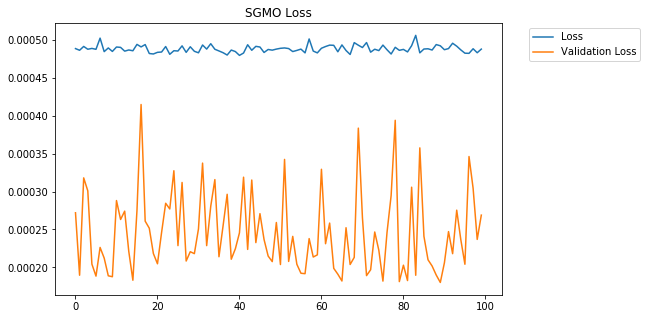

SGMO 0.33461397293558437 0.5994115907934774


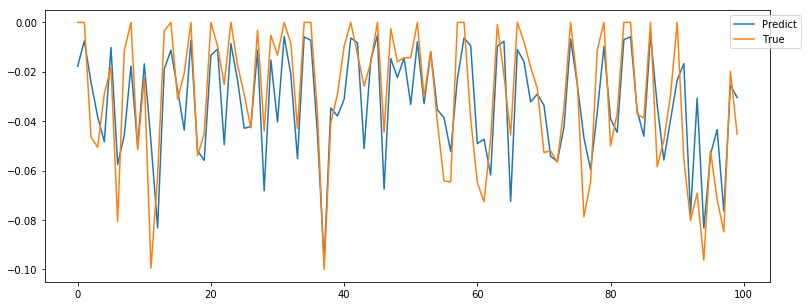

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


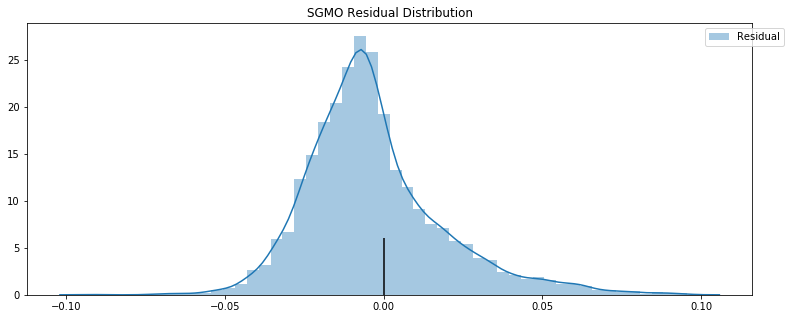

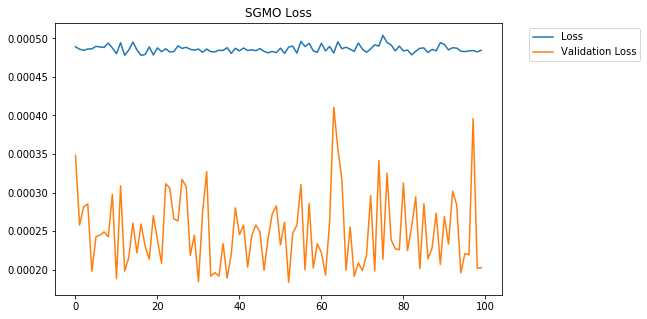

SGMO 0.49926544866133193 0.6042147310156523


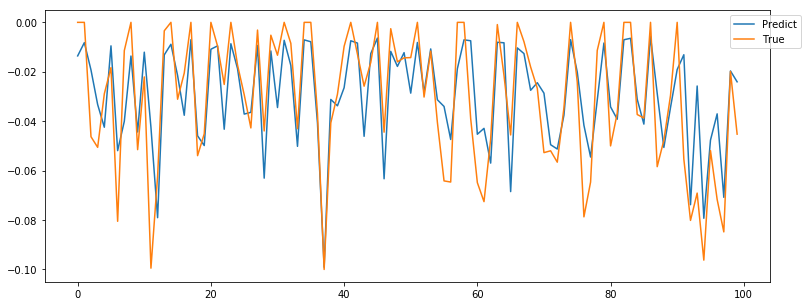

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


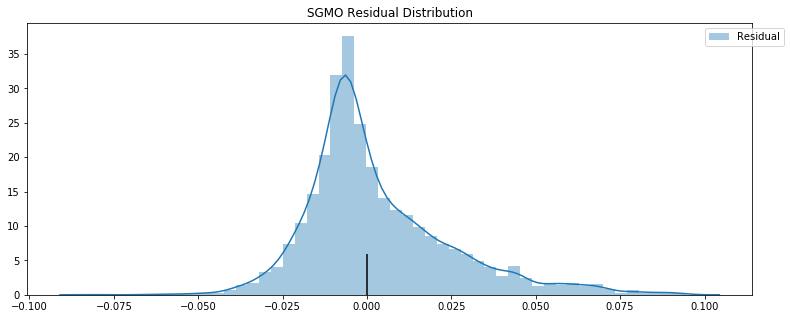

In [10]:
count= 100
for i in range(0, 50):
    

    stock = 'SGMO'
    (feature_train, label_train, feature_test, label_test) = (processed_data[stock]['data_1'],processed_data[stock]['target_1'], 
                                                                processed_data[stock]['data_test'], processed_data[stock]['target_test']) 
    model.fit(feature_train, label_train, batch_size=50, epochs=100, validation_data = (feature_test, label_test), verbose=0)
    dict_ = model.history.history
    plt.figure(figsize=(8,5))
    plt.title(f"{stock} Loss")
    plt.plot(dict_['loss'], label = 'Loss')
    plt.plot(dict_['val_loss'], label= 'Validation Loss')
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.show()
    filepath = f"Model_GRU_{count}.h5"
    model.save_weights(filepath)
    count += 100
    predict_train = model.predict(feature_train)
    predict_test = model.predict(feature_test)
    print(stock,r2_score(label_test, predict_test), r2_score(label_train, predict_train))
    plt.figure(figsize=(13,5))
    plt.plot(predict_train[-100:], label = 'Predict')
    plt.plot(label_train[-100:], label= 'True')
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.show()

    plt.figure(figsize=(13,5))
    plt.title(f"{stock} Residual Distribution")
    sns.distplot(predict_train- label_train, label = 'Residual')
    plt.vlines(0,0,6)
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.show()
